In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def coth(a):
    if a>0: return (1+tf.math.exp(-2*a))/(1-tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)+1)/(tf.math.exp(2*a)-1)
    if a==0: return 0

def tanh(a):
    if a>0: return (1-tf.math.exp(-2*a))/(1+tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)-1)/(tf.math.exp(2*a)+1)
    if a==0: return 0

In [39]:
data=100
layer=10
n_ini=1.0
n_fin=0.1
dn=-0.1
m2=-1
lam=1
c_reg1=0.1
c_reg2=0.01

<tf.Variable 'Variable:0' shape=(10,) dtype=float64, numpy=
array([2.42607609, 3.49064914, 2.63050506, 1.07963399, 1.46338168,
       1.29446413, 2.06225144, 2.46198071, 4.56566148, 9.29891221])>
tf.Tensor(
[ 3.01490951  3.02722263  3.04978824  3.09134316  3.16854751  3.31437385
  3.59861219  4.18820179  5.58607614 10.29821491], shape=(10,), dtype=float64)


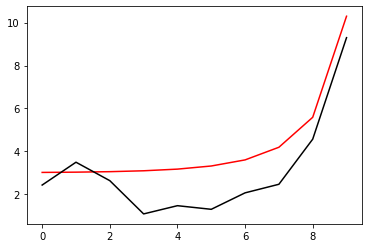

In [29]:
h=tf.zeros(layer)
h_in=[]
#h_in=[3.0205426, 3.022307 , 3.0291433, 3.04402  , 3.0732646, 3.131582 ,
# 3.2585216, 3.5762587, 4.59116  , 9.752249]
for i in range (layer):
#   midd=np.float64(10.0)
#    h_in.append(midd)
#    midd=3*coth(3*((i-layer)*dn)).numpy()
#    h_in.append(midd)
    mu=1/(1-i/10)
    h_inn=np.float64(np.random.normal(mu, 1))
    h_in.append(h_inn)
h=tf.Variable(h_in)
print(h)

h_real=tf.zeros(layer)
middd=[]
for i in range (layer):
    midd=3*coth(3*((i-layer)*dn)).numpy()
    middd.append(midd)
h_real=tf.constant(middd)
print(h_real)
plt.plot(h_real, 'r-')
plt.plot(h.numpy(), 'k-')
plt.show()

In [9]:
phi=tf.Variable(tf.zeros(1))
pi=tf.Variable(tf.zeros(1))

def F_func(a,b):
    return 2*b/n_fin-m2*a-lam*(a**3)

def t_func(a):
    return 0.5*(tf.math.tanh(100*(a-0.1))-tf.math.tanh(100*(a+0.1))+2)

def t_func2(a):
    return 0.5*(tanh(100*(a-0.1))-tanh(100*(a+0.1))+2)

In [10]:
def LP2(hh, phi, pi):
    for j in range (layer-1):
        phi1=phi+dn*pi
        pi1 =phi*m2*dn+(1-dn*hh[j])*pi+dn*lam*(phi1**3)
        phi=phi1
        pi=pi1
    return phi, pi
def NN_func_p(hh):
    Positive=[]
    while len(Positive)<data:
        phi1=np.random.uniform(0.0, 1.5, 10000)
        pi1=np.random.uniform(-0.2, 0.2, 10000)
        phi_1, pi_1=LP2(hh, phi1, pi1)
        for i in range (10000):
            if len(Positive)>=100: break
            if tf.math.abs(F_func(phi_1[i], pi_1[i]))<0.1: Positive.append([phi1[i], pi1[i]]), print(len(Positive))
            else: continue
    return Positive
def NN_func_n(hh):
    Negative=[]
    while len(Negative)<data:
        phi1=np.random.uniform(0.0, 1.5, 200)
        pi1=np.random.uniform(-0.2, 0.2, 200)
        phi_1, pi_1 = LP2(hh, phi1, pi1)
        for i in range (200):
            if len(Negative)>=100: break
            if tf.math.abs(F_func(phi_1[i], pi_1[i]))>=0.1: Negative.append([phi1[i], pi1[i]])
            else: continue
    return Negative
def NN_func_01(hh, list1):
    PP=[]
    NN=[]
    for i in range (data):
        phi=list1[i][0]
        pi=list1[i][1]
        if tf.math.abs(LP2(hh, phi, pi)[1])<0.1: PP.append([phi, pi])
        else: NN.append([phi, pi])
    return PP, NN

In [11]:
Positive=NN_func_p(h_real)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [12]:
Negative=NN_func_n(h_real)

In [13]:
[Positive0, Positive1]=NN_func_01(h, Positive)
[Negative0, Negative1]=NN_func_01(h, Negative)

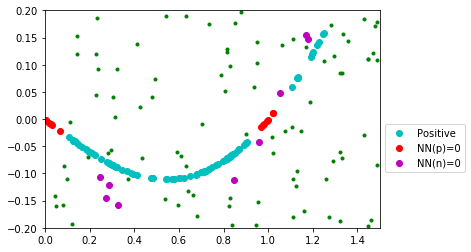

In [14]:
x_data1=[v[0] for v in Positive0]
y_data1=[v[1] for v in Positive0]
x_data2=[v[0] for v in Positive1]
y_data2=[v[1] for v in Positive1]
x_data3=[v[0] for v in Negative0]
y_data3=[v[1] for v in Negative0]
x_data4=[v[0] for v in Negative1]
y_data4=[v[1] for v in Negative1]
plt.plot(x_data4, y_data4, 'g.')
plt.plot(x_data2, y_data2, 'co', label='Positive')
plt.plot(x_data1, y_data1, 'ro', label='NN(p)=0')
plt.plot(x_data3, y_data3, 'mo', label='NN(n)=0')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

# Error function

$E=\sum_{data} \left\vert y(\bar{x}^{(1)}) - \bar{y} \right\vert+E_{reg}(W)$
, $E_{reg}=c_{reg}^{(1)}\sum_{n=1}^{N-1}(\eta^{(n)})^{4}(h(\eta^{(n+1)})-h(\eta^{(n)}))^{2}+c_{reg}^{(2)}(h(\eta^{(N)})-1/\eta^{(N)})^{2}$

In [40]:
def Error_func(hh):
    phi0=np.array([v[0] for v in Positive])
    pi0=np.array([v[1] for v in Positive])
    phi1=np.array([v[0] for v in Negative])
    pi1=np.array([v[1] for v in Negative])
    phi_0, pi_0=LP2(hh, phi0, pi0)
    phi_1, pi_1=LP2(hh, phi1, pi1)
    PPlist=t_func(pi_0)
    NNlist=t_func(pi_1)
    sum_p=sum(PPlist)
    sum_n=data-sum(NNlist)

    inside=0
    for k in range (layer-1):
        second=((n_ini+k*dn)**4)*((hh[k+1]-hh[k])**2)
        inside=inside+second
    E_reg1=c_reg1*inside
    E_reg2=c_reg2*((hh[layer-1]-1/n_fin)**2)
    return E_reg1+E_reg2+sum_p+sum_n

In [30]:
print(Error_func(h_real))
print(Error_func(h))

tf.Tensor(0.007084312177393807, shape=(), dtype=float64)
tf.Tensor(72.9091854774224, shape=(), dtype=float64)


In [17]:
def run():
    with tf.GradientTape() as g:
        loss=Error_func(h) #돌리기전에 Error함수 수정 잊지말것
        gradients=g.gradient(loss, [h])
    optimizer.apply_gradients(zip(gradients, [h]))

100 62.65778389380094
[2.53100049 3.59497741 2.73390602 1.18189745 1.56398095 1.39133133
 2.13280646 2.34350559 4.45475694 9.19917049]


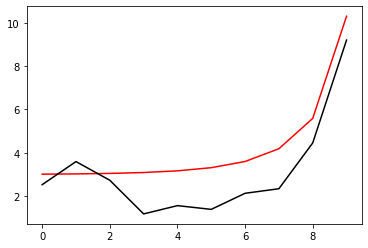

200 43.65487792856298
[2.65751778 3.72179891 2.86021115 1.30772298 1.6900032  1.516847
 2.23569976 2.22495857 4.33116049 9.09980649]


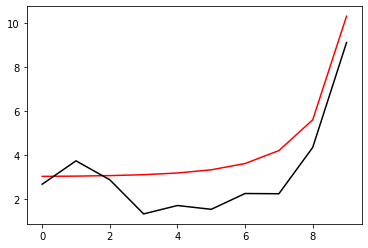

300 11.069485481885831
[2.80057038 3.86685296 3.00646835 1.45563411 1.84185289 1.67628159
 2.4281514  2.14959202 4.2136414  9.00089298]


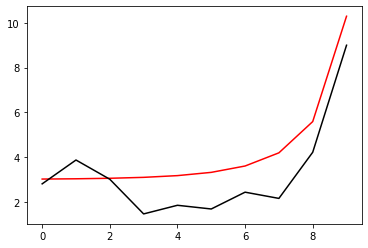

400 2.7929694986146893
[2.87512556 3.9379242  3.07532261 1.5230217  1.90884255 1.74645056
 2.5153087  2.15050619 4.17656066 8.90303678]


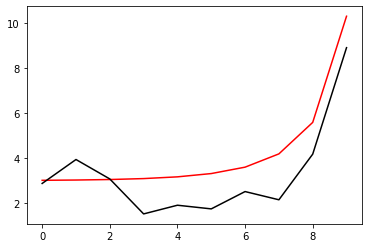

500 2.456697826727153
[2.89222281 3.95271866 3.09016259 1.53800936 1.9228919  1.761701
 2.5350127  2.15614314 4.17122743 8.80747688]


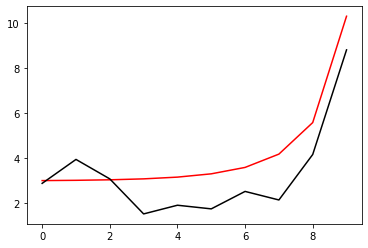

600 2.385633259641299
[2.9006507  3.95918127 3.09742685 1.54600547 1.92992434 1.76974099
 2.54521102 2.1599497  4.16870732 8.71417175]


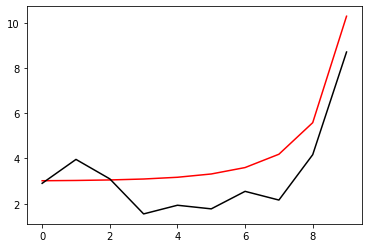

700 2.3532831025033962
[2.9067117  3.96321076 3.10254704 1.55208436 1.93492292 1.77570495
 2.55253556 2.16311511 4.16693574 8.62292421]


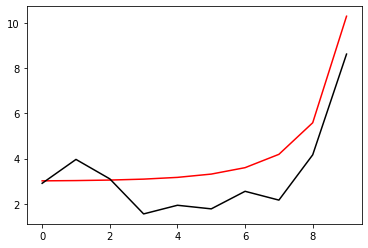

800 2.3342894368261695
[2.91164664 3.96597575 3.1066045  1.55726218 1.93889349 1.78063915
 2.55836646 2.1659529  4.16552508 8.53360232]


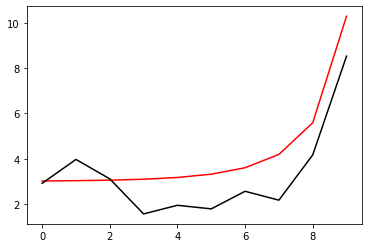

900 2.3215277665733245
[2.91592852 3.96792285 3.11001442 1.56193148 1.94222593 1.7849514
 2.56324612 2.16859675 4.164329   8.44611787]


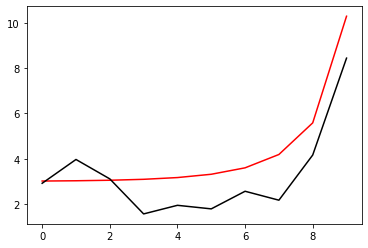

1000 2.3121813149960073
[2.91979101 3.96927212 3.11298284 1.56628872 1.94511511 1.78884665
 2.56744797 2.17111785 4.16327538 8.36040992]


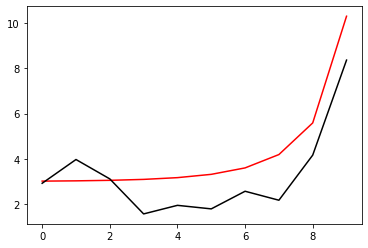

1100 2.3049030177931007
[2.92336795 3.97014834 3.11562782 1.57044798 1.94767346 1.79244391
 2.57113053 2.17355954 4.16232293 8.27643557]


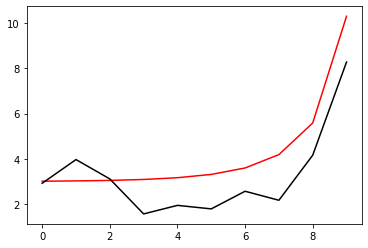

1200 2.298963910781561
[2.92674389 3.97062877 3.11802371 1.57448252 1.94997217 1.79581913
 2.57439433 2.17595071 4.16144557 8.19416461]


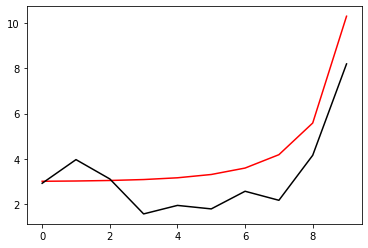

1300 2.2939334196248513
[2.9299761  3.9707641  3.12022046 1.57844296 1.95205934 1.79902423
 2.57730724 2.17831201 4.1606256  8.11357638]


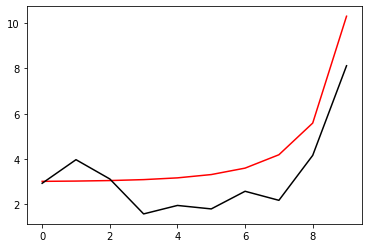

1400 2.2895399475981804
[2.93310558 3.97058891 3.12225336 1.58236639 1.95396914 1.80209656
 2.57991717 2.18065897 4.15985036 8.03465768]


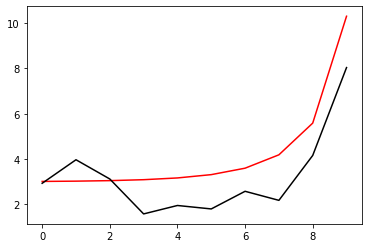

1500 2.2856031335407003
[2.93616294 3.97012734 3.12414822 1.5862813  1.9557267  1.80506412
 2.58225905 2.18300385 4.1591104  7.95740148]


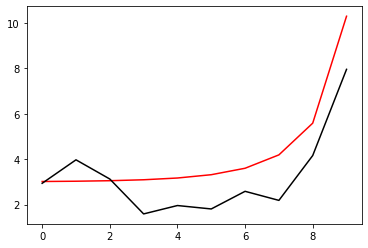

1600 2.2819981107184715
[2.93917191 3.96939643 3.12592449 1.59021051 1.95735112 1.80794859
 2.58435902 2.18535668 4.15839841 7.88180602]


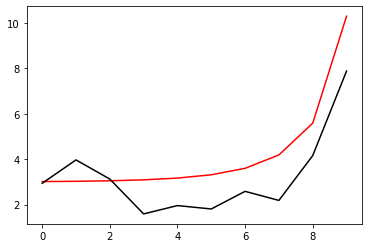

1700 2.2786353855201824
[2.94215144 3.9684082  3.12759715 1.59417289 1.9588572  1.81076724
 2.58623691 2.18772592 4.15770857 7.80787419]


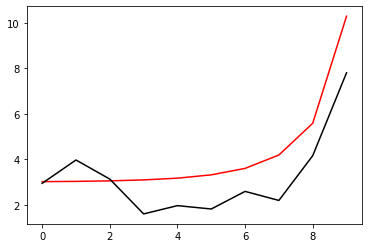

1800 2.2754488989832753
[2.94511706 3.96717096 3.12917793 1.5981846  1.96025667 1.81353419
 2.58790799 2.19011893 4.15703612 7.73561307]


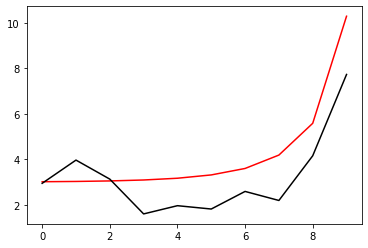

1900 2.2723886294538014
[2.94808185 3.96569024 3.13067617 1.6022598  1.96155898 1.81626118
 2.58938407 2.19254227 4.15637708 7.66503359]


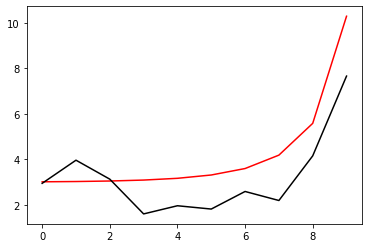

2000 2.2694158392348056
[2.95105701 3.96396937 3.13209932 1.60641121 1.96277185 1.81895817
 2.59067429 2.1950019  4.15572807 7.59615023]


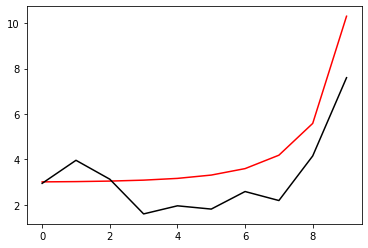

2100 2.266499924460241
[2.95405233 3.96201    3.1334534  1.61065052 1.96390164 1.82163376
 2.59178568 2.19750334 4.15508615 7.5289808 ]


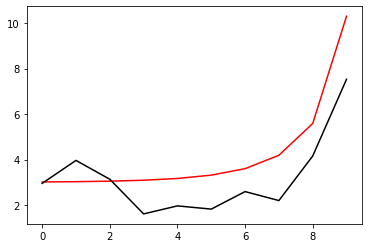

2200 2.263616271631193
[2.95707652 3.95981236 3.13474327 1.61498862 1.96495367 1.82429549
 2.59272358 2.20005179 4.1544487  7.46354621]


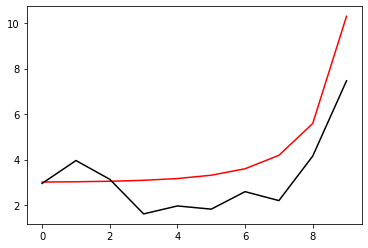

2300 2.2607447657207604
[2.96013743 3.95737554 3.13597282 1.61943584 1.96593245 1.82695004
 2.59349197 2.20265221 4.15381342 7.39987026]


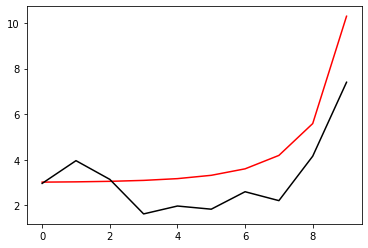

2400 2.257868731437479
[2.96324224 3.95469769 3.13714519 1.62400211 1.96684181 1.8296034
 2.59409367 2.20530938 4.15317817 7.33797938]


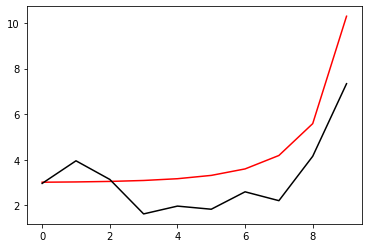

2500 2.2549741693852945
[2.96639759 3.95177614 3.13826282 1.62869705 1.96768508 1.83226104
 2.59453055 2.20802795 4.152541   7.2779024 ]


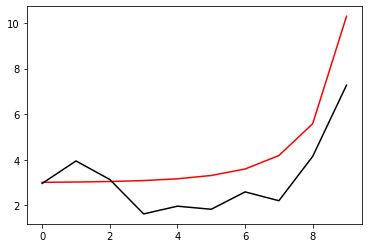

2600 2.252049197335535
[2.96960968 3.94860755 3.13932762 1.63353008 1.96846513 1.83492793
 2.59480369 2.21081253 4.15190012 7.21967026]


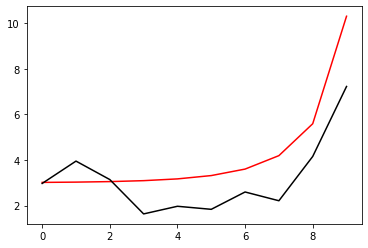

2700 2.2490836369658256
[2.97288434 3.94518801 3.14034097 1.63851051 1.96918454 1.83760872
 2.59491345 2.21366762 4.1512538  7.16331566]


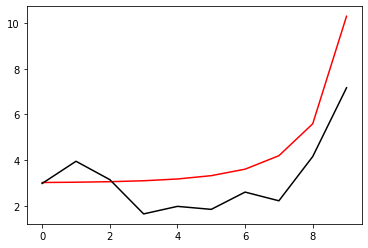

2800 2.246068705624571
[2.97622711 3.94151308 3.14130383 1.64364756 1.96984561 1.84030771
 2.59485962 2.21659773 4.15060043 7.10887267]


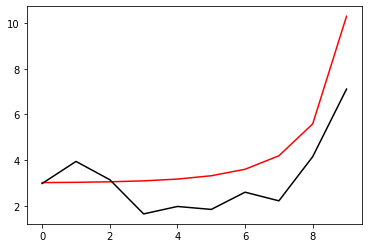

2900 2.242996785186129
[2.97964326 3.93757794 3.14221673 1.64895044 1.97045044 1.84302896
 2.59464149 2.21960738 4.14993847 7.0563763 ]


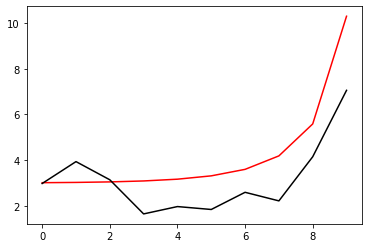

3000 2.2398612483701457
[2.98313785 3.93337739 3.14307986 1.65442836 1.97100101 1.84577628
 2.59425788 2.22270105 4.14926641 7.00586192]


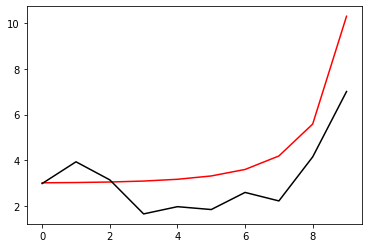

3100 2.2366563285143766
[2.98671573 3.92890596 3.14389307 1.66009058 1.97149917 1.84855334
 2.59370727 2.22588331 4.14858282 6.95736474]


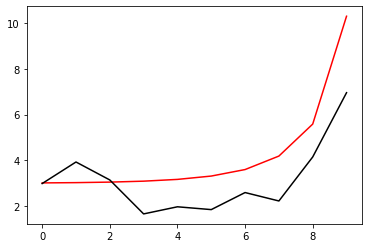

3200 2.2333770226475878
[2.99038157 3.92415793 3.14465589 1.66594639 1.97194676 1.85136359
 2.59298778 2.22915872 4.14788627 6.91091902]


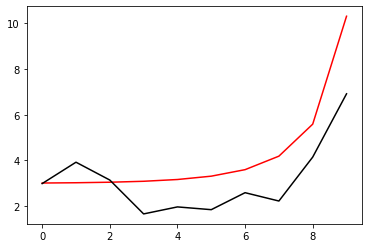

3300 2.2300190203951145
[2.99413987 3.91912742 3.14536752 1.67200517 1.97234559 1.85421037
 2.5920973  2.2325319  4.1471754  6.86655737]


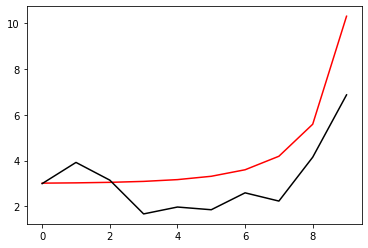

3400 2.226578653141658
[2.99799496 3.91380843 3.1460269  1.67827638 1.9726975  1.85709688
 2.59103347 2.23600752 4.14644883 6.82430983]


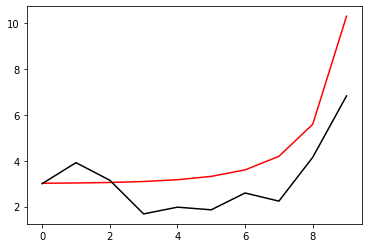

3500 2.223052859222295
[3.00195102 3.90819488 3.14663267 1.68476954 1.97300441 1.8600262
 2.58979374 2.23959031 4.14570525 6.78420293]


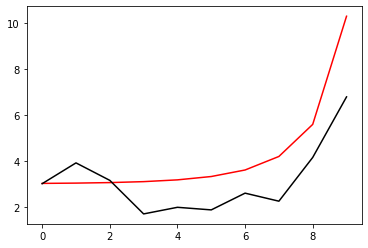

3600 2.2194391618778755
[3.00601203 3.90228071 3.14718321 1.69149428 1.97326835 1.86300132
 2.58837546 2.24328506 4.14494332 6.74625864]


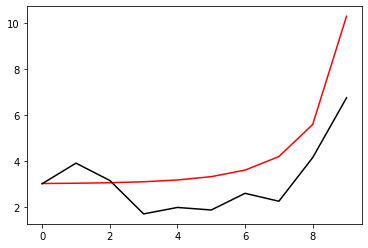

3700 2.2157356574053924
[3.01018181 3.89605989 3.14767659 1.69846028 1.9734915  1.8660251
 2.58677586 2.24709661 4.14416174 6.71049332]


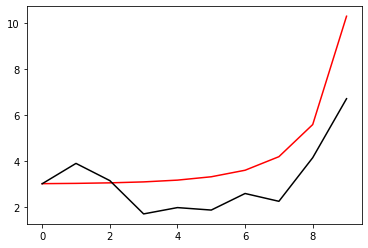

3800 2.211941011435031
[3.01446399 3.88952653 3.14811064 1.70567731 1.97367621 1.86910033
 2.58499215 2.25102987 4.14335921 6.67691649]


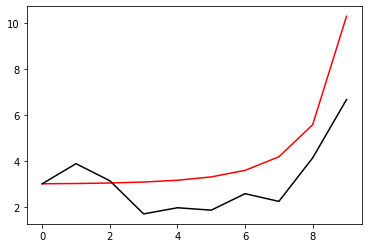

3900 2.208054461625287
[3.01886197 3.88267491 3.14848291 1.71315517 1.97382508 1.87222971
 2.58302152 2.25508981 4.14253447 6.64552977]


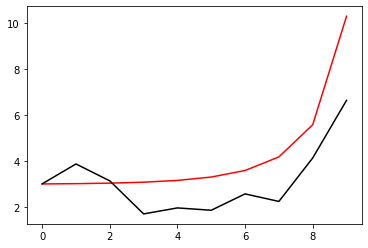

4000 2.2040758253251314
[3.02337894 3.87549956 3.14879068 1.7209037  1.97394095 1.87541583
 2.58086122 2.25928147 4.14168623 6.61632571]


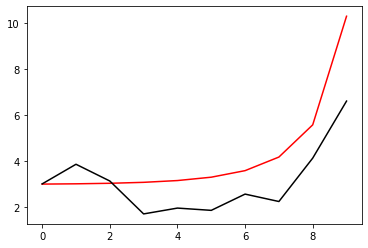

4100 2.2000055109320784
[3.02801785 3.86799533 3.14903097 1.72893277 1.97402699 1.87866121
 2.5785086  2.26360992 4.14081326 6.58928674]


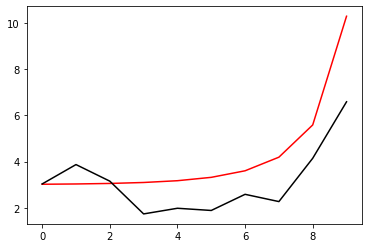

4200 2.195844531801706
[3.03278134 3.86015745 3.14920053 1.73725221 1.97408671 1.88196826
 2.57596115 2.2680803  4.13991429 6.56438427]


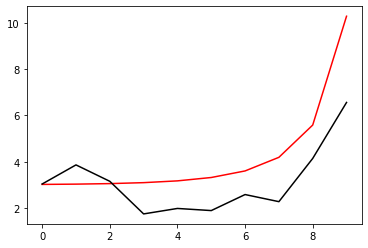

4300 2.1915945216457335
[3.03767177 3.85198165 3.14929585 1.74587184 1.97412403 1.88533933
 2.57321659 2.27269779 4.13898813 6.54157794]


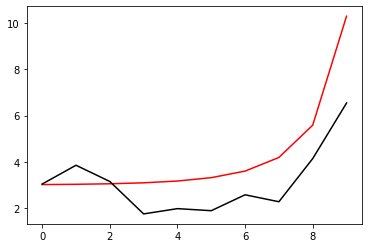

4400 2.1872577504123205
[3.04269117 3.84346419 3.14931316 1.75480136 1.9741433  1.88877663
 2.57027289 2.27746764 4.13803356 6.52081509]


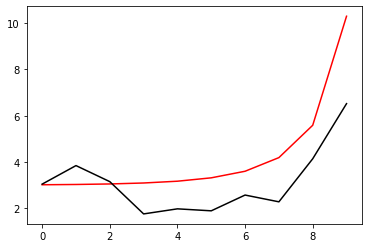

4500 2.1828371396734902
[3.04784118 3.834602   3.14924844 1.76405039 1.9741494  1.89228233
 2.56712838 2.28239511 4.13704939 6.50203061]


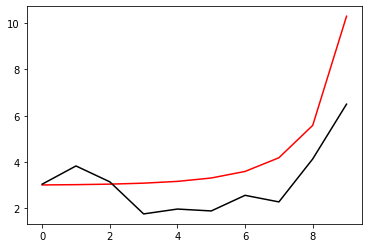

4600 2.1783362765652226
[3.05312304 3.8253927  3.14909741 1.77362834 1.97414771 1.89585846
 2.56378177 2.2874855  4.13603449 6.48514703]


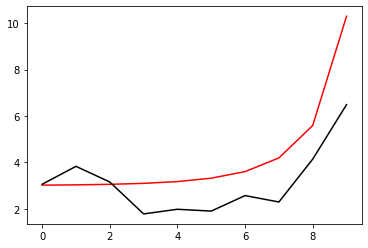

4700 2.173759425336674
[3.05853754 3.81583477 3.14885558 1.78354445 1.97414427 1.89950698
 2.56023228 2.29274417 4.13498772 6.47007505]


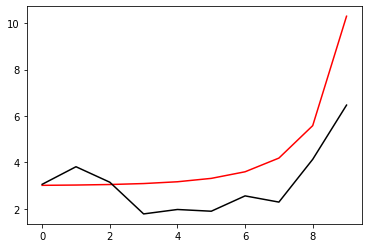

4800 2.1691115355719006
[3.06408499 3.80592758 3.14851821 1.79380767 1.97414574 1.90322975
 2.55647965 2.29817648 4.13390801 6.45671445]


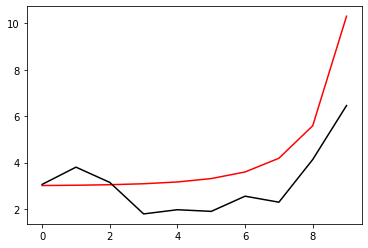

4900 2.1643982461557894
[3.06976518 3.79567154 3.14808037 1.80442661 1.97415952 1.90702853
 2.55252432 2.30378783 4.13279432 6.44495536]


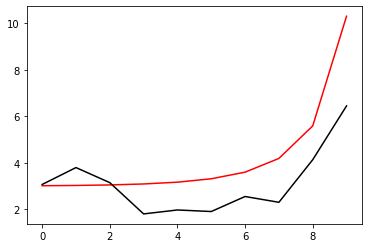

5000 2.1596258840654987
[3.07557729 3.78506815 3.14753695 1.81540953 1.9741938  1.91090501
 2.54836745 2.30958366 4.13164567 6.43467994]


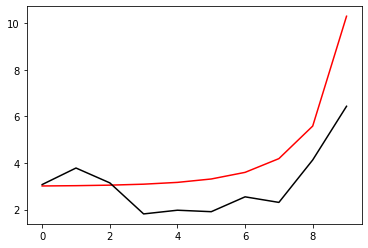

In [31]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 5001):
    run()
    if i%100==0: print(i, Error_func(h).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

100 2.123425033190057
[3.14720824 3.71151252 3.08160947 1.88846495 2.00608497 1.98124127
 2.47717073 2.38142991 4.05985668 6.36943733]


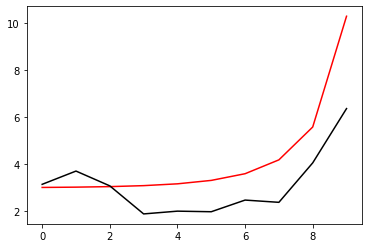

200 2.0961063140719225
[3.20945951 3.64287469 3.04077034 1.95702087 2.05315846 2.04078602
 2.42074049 2.44601617 3.99872683 6.32156074]


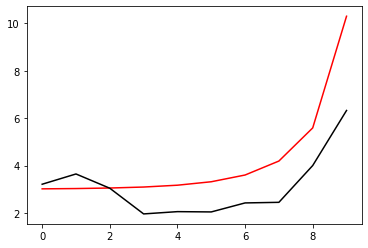

300 2.0746287766064033
[3.26432781 3.58183358 3.04197087 2.02453301 2.19211111 2.10506869
 2.40483963 2.51673184 3.96968201 6.29033441]


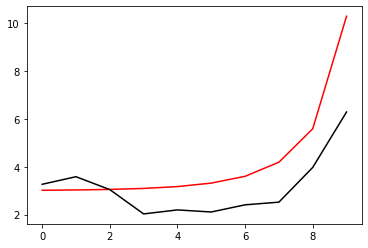

400 0.46754409346050235
[3.43289707 3.69186739 3.2710745  2.19542535 2.44915829 2.31789388
 2.62632814 2.73816453 4.19136301 6.37597641]


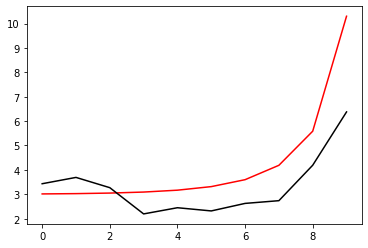

500 0.28050273664654535
[3.38206854 3.66034768 3.27697748 2.23898112 2.50163149 2.38770483
 2.70696386 2.82938816 4.29113927 6.463498  ]


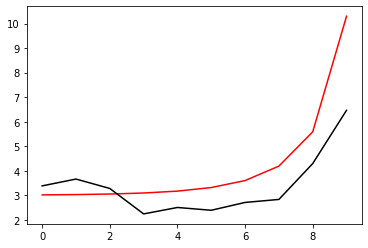

600 0.19579704447694032
[3.3490949  3.63552141 3.28123539 2.27526641 2.53893952 2.4368463
 2.76161579 2.89024651 4.35626648 6.51256206]


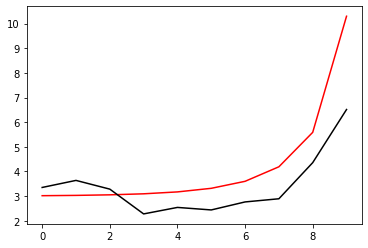

700 0.15081456364720747
[3.32594964 3.61358694 3.28311924 2.30650156 2.56630467 2.47375129
 2.80165799 2.93496844 4.40361402 6.54638585]


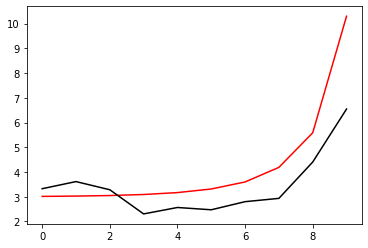

800 0.1232925290608993
[3.30899703 3.59326501 3.28326546 2.33485366 2.58753083 2.50339001
 2.83308339 2.97037397 4.44074181 6.57190784]


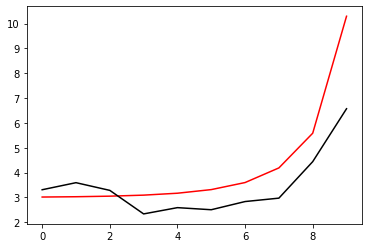

900 0.10456972296671646
[3.29624337 3.57389682 3.28206759 2.36148639 2.60468483 2.52832761
 2.858911   2.99981626 4.47130486 6.59238784]


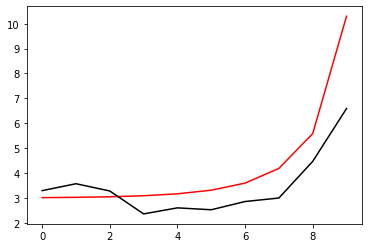

1000 0.09078986601222098
[3.2865076  3.55513748 3.27977487 2.38704637 2.61897352 2.55000918
 2.88082558 3.02514572 4.49730632 6.60951277]


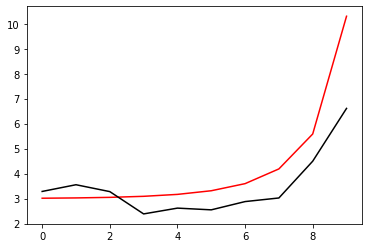

1100 0.08003362238252924
[3.27903301 3.5368072  3.27655891 2.41190953 2.63115981 2.56931727
 2.8998522  3.04748109 4.51995276 6.624247  ]


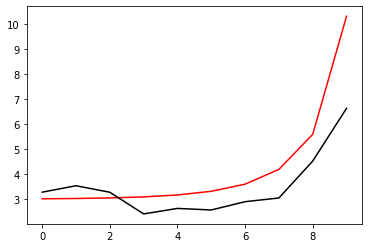

1200 0.07126078808468478
[3.27330082 3.51881746 3.27254778 2.43629991 2.64175939 2.58682622
 2.91665754 3.06754701 4.54002372 6.6371889 ]


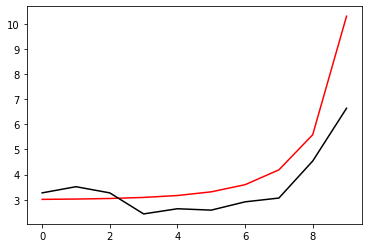

1300 0.0638695261918169
[3.26893493 3.50113261 3.26784429 2.46035057 2.65114061 2.60292873
 2.93169802 3.08583834 4.55805026 6.64873371]


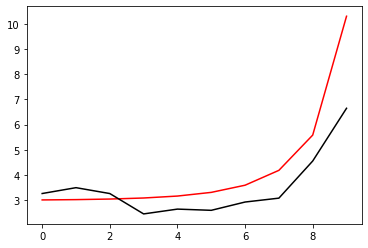

1400 0.05749322084812879
[3.26564975 3.48374846 3.2625363  2.48413709 2.6595789  2.61790397
 2.94529907 3.10270723 4.5744093  6.65915532]


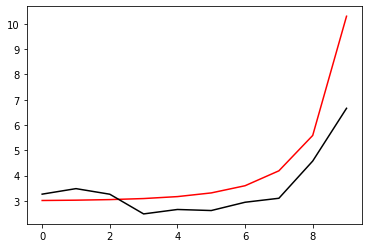

1500 0.051898885610005614
[3.26322007 3.4666797  3.25670288 2.50769709 2.66728822 2.63195669
 2.95770026 3.11841266 4.58937715 6.66865071]


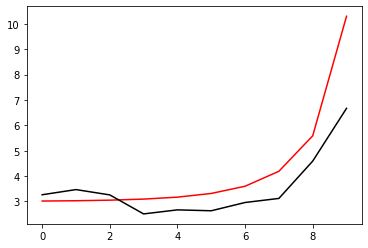

1600 0.04693287575250444
[3.26146274 3.44995202 3.25041797 2.53104233 2.67444011 2.64524093
 2.9690827  3.13315018 4.60316154 6.67736576]


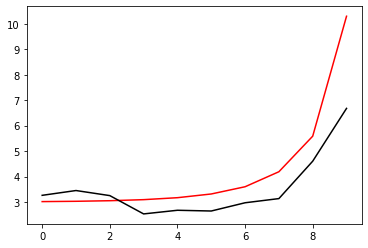

1700 0.042490264908498984
[3.26022513 3.43359699 3.24375269 2.55416649 2.68117572 2.65787503
 2.97958624 3.14707068 4.61592191 6.68541109]


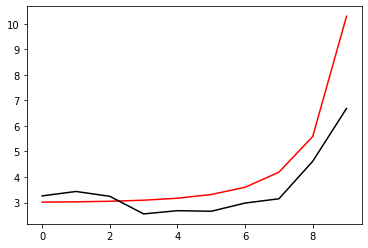

1800 0.03849679143121788
[3.25937761 3.41764858 3.23677662 2.57705052 2.68761368 2.66995158
 2.9893208  3.16029264 4.62778263 6.6928721 ]


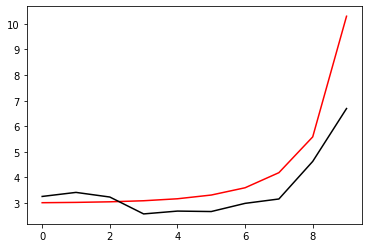

1900 0.0348978311974984
[3.25880855 3.40214072 3.22955858 2.59966641 2.69385532 2.68154416
 2.99837416 3.17291049 4.63884195 6.69981574]


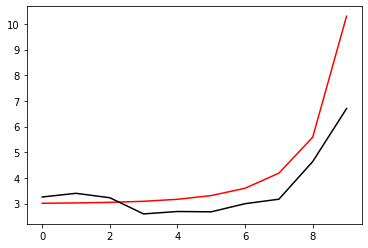

2000 0.031651475023009676
[3.25842092 3.38710557 3.2221669  2.62198    2.6999882  2.69271213
 3.00681729 3.18500041 4.64917828 6.70629508]


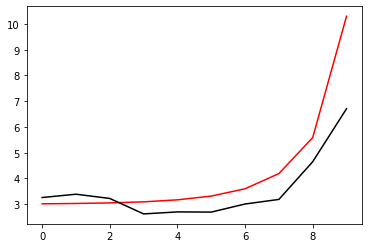

2100 0.028724097405576448
[3.25812991 3.37257228 3.21466932 2.64395315 2.70608857 2.70350404
 3.01470825 3.19662446 4.65885471 6.71235257]


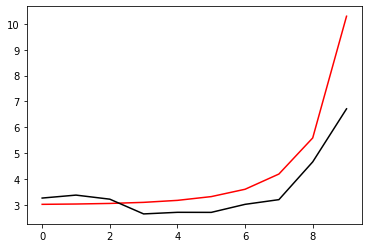

2200 0.026087488497843307
[3.25786137 3.35856611 3.20713275 2.66554548 2.71222304 2.71396021
 3.02209509 3.20783363 4.66792222 6.7180224 ]


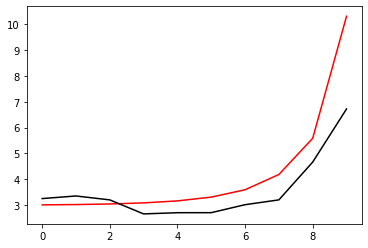

2300 0.023716995225632764
[3.25755056 3.34510781 3.1996228  2.68671582 2.71844976 2.72411467
 3.02901796 3.21867016 4.6764222  6.72333222]


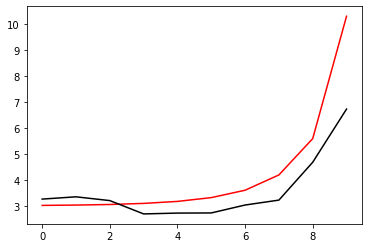

2400 0.021590329217080238
[3.25714141 3.33221323 3.19220311 2.70742342 2.72481923 2.73399661
 3.03551082 3.22916919 4.68438834 6.72830448]


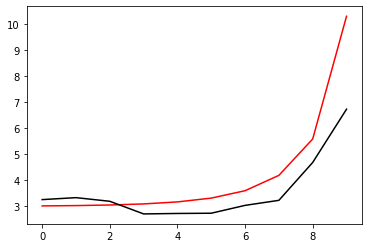

2500 0.019686823035664016
[3.25658584 3.31989316 3.18493468 2.72762902 2.73137481 2.74363159
 3.04160269 3.2393602  4.69184804 6.73295741]


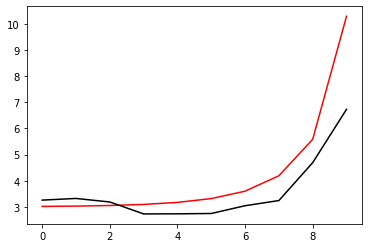

2600 0.017986990775528983
[3.25584336 3.30815326 3.17787507 2.74729579 2.73815316 2.75304244
 3.04731877 3.24926801 4.69882362 6.73730586]


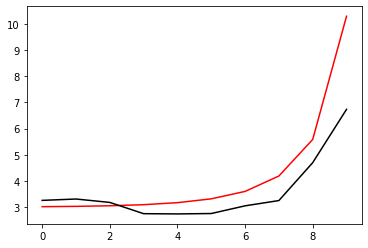

2700 0.01647229522657955
[3.25488065 3.29699416 3.17107758 2.76639009 2.74518444 2.76225003
 3.05268124 3.25891362 4.70533319 6.74136186]


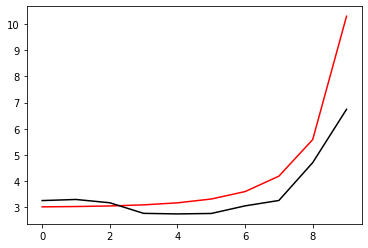

2800 0.015125053166881052
[3.25367131 3.28641165 3.16459047 2.78488221 2.75249253 2.77127383
 3.05770997 3.26831494 4.71139146 6.74513521]


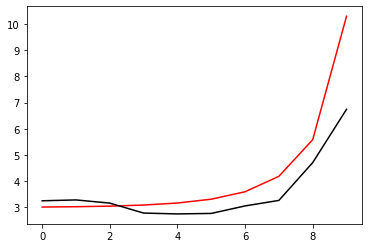

2900 0.01392842956340308
[3.25219548 3.27639703 3.15845617 2.80274689 2.76009517 2.7801324
 3.06242314 3.27748731 4.71701032 6.74863383]


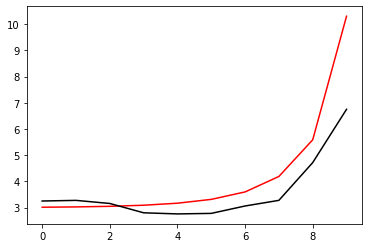

3000 0.012866484496204872
[3.25043963 3.26693744 3.15271064 2.81996386 2.76800414 2.78884376
 3.06683774 3.28644398 4.72219935 6.75186412]


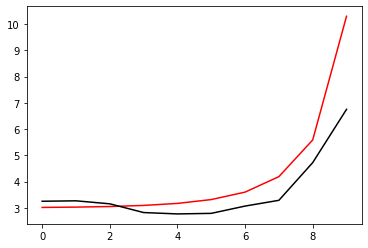

3100 0.011924245844649423
[3.24839616 3.25801634 3.14738276 2.8365181  2.77622535 2.79742564
 3.07096996 3.29519643 4.72696627 6.75483125]


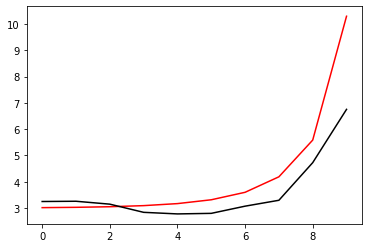

3200 0.011087787642931455
[3.24606312 3.249614   3.14249394 2.85240009 2.78475908 2.80589568
 3.07483563 3.30375477 4.73131725 6.75753938]


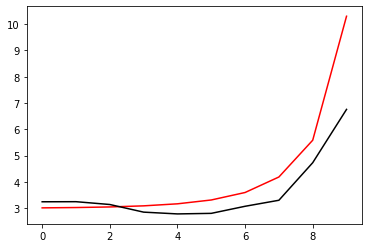

3300 0.01034429942456567
[3.24344379 3.24170799 3.13805782 2.86760587 2.7936002  2.81427151
 3.07845048 3.31212792 4.73525723 6.75999187]


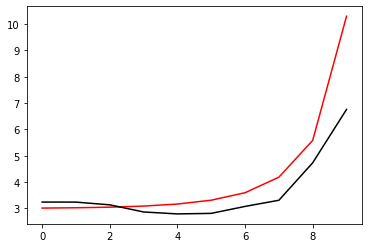

3400 0.009682136365281622
[3.24054626 3.23427372 3.13408025 2.88213698 2.80273846 2.82257083
 3.08183044 3.32032383 4.73879016 6.76219139]


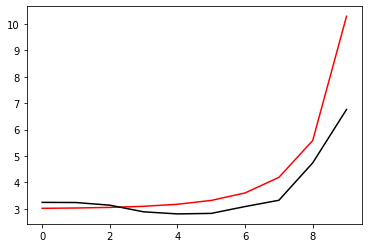

3500 0.009090843902172007
[3.23738295 3.22728499 3.13055941 2.89600025 2.81215883 2.83081138
 3.08499184 3.32834966 4.74191916 6.76414011]


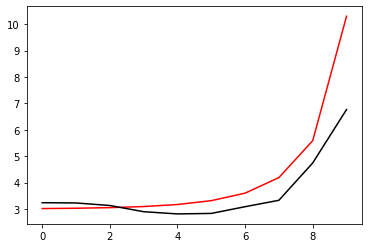

3600 0.008561153887572129
[3.23397012 3.22071444 3.12748612 2.90920742 2.82184191 2.83901079
 3.08795167 3.3362119  4.74464674 6.76583976]


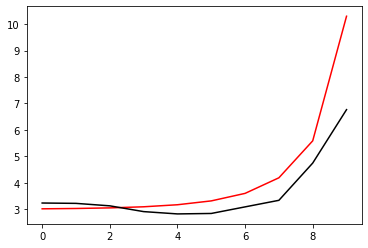

3700 0.008084952259338411
[3.23032731 3.21453412 3.12484446 2.92177471 2.8317644  2.84718652
 3.09072765 3.34391649 4.74697485 6.76729174]


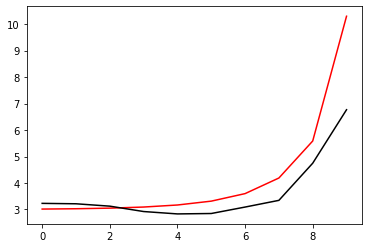

3800 0.007655220636121924
[3.22647677 3.20871586 3.12261242 2.9337222  2.84189961 2.85535562
 3.09333842 3.35146884 4.74890503 6.76849713]


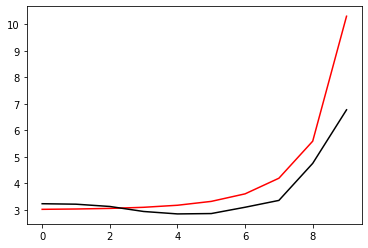

3900 0.00726595611520599
[3.22244287 3.20323176 3.12076284 2.94507313 2.852218   2.86353453
 3.0958036  3.35887398 4.75043845 6.76945682]


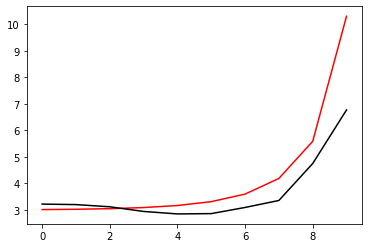

4000 0.0069120748033117425
[3.2182515  3.19805454 3.1192644  2.95585323 2.86268781 2.87173883
 3.09814384 3.36613649 4.75157598 6.77017145]


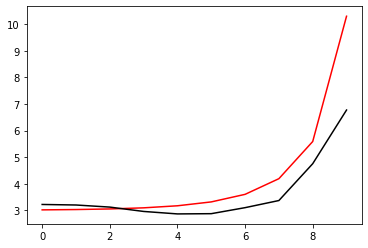

4100 0.0065893052222868375
[3.21392948 3.19315785 3.1180827  2.96608982 2.8732756  2.87998297
 3.10038085 3.37326063 4.75231821 6.77064151]


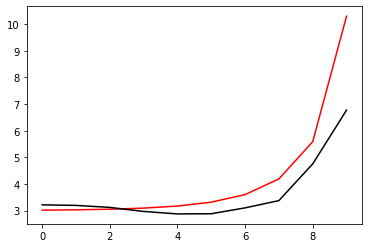

4200 0.006294077727380052
[3.20950396 3.18851663 3.11718138 2.97581113 2.8839469  2.88827998
 3.1025374  3.3802503  4.75266545 6.7708673 ]


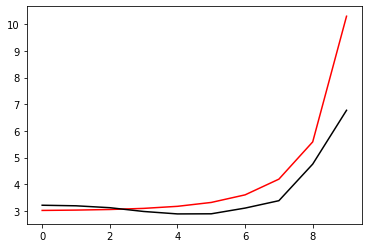

4300 0.006023415534576779
[3.20500193 3.18410733 3.11652323 2.98504547 2.89466676 2.89664123
 3.10463727 3.38710907 4.75261779 6.77084898]


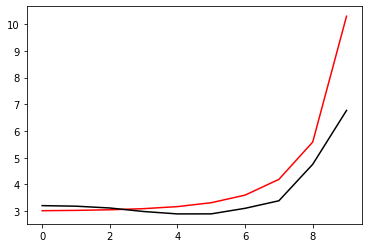

4400 0.005774832000611274
[3.20044969 3.17990809 3.1160712  2.99382056 2.90540029 2.90507616
 3.10670514 3.39384022 4.75217506 6.77058652]


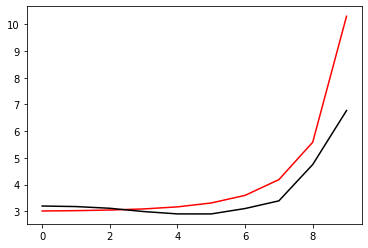

4500 0.005546237595217199
[3.19587244 3.17589897 3.11578937 3.00216291 2.91611317 2.91359205
 3.10876656 3.40044673 4.75133687 6.77007977]


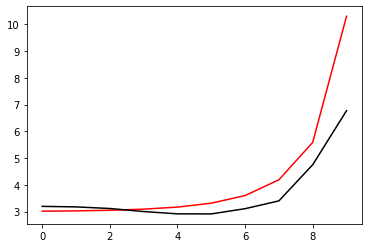

4600 0.005335858714859022
[3.19129389 3.17206199 3.11564371 3.01009733 2.92677208 2.92219385
 3.1108477  3.40693133 4.75010257 6.7693284 ]


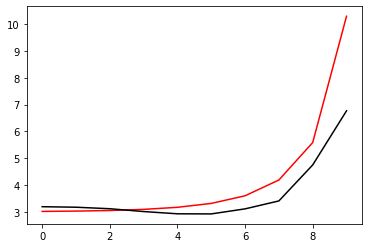

4700 0.0051421692624138635
[3.18673602 3.16838122 3.11560273 3.01764653 2.93734508 2.93088399
 3.11297525 3.41329652 4.7484713  6.76833196]


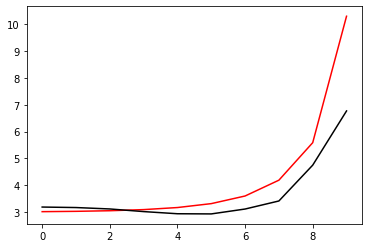

4800 0.00496383487679233
[3.18221884 3.16484282 3.11563797 3.02483093 2.9478019  2.93966232
 3.11517619 3.41954463 4.74644198 6.76708985]


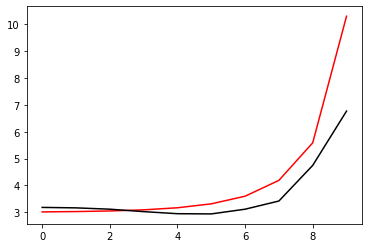

4900 0.00479966891251216
[3.17776027 3.16143495 3.11572428 3.0316685  2.95811419 2.94852605
 3.1174775  3.42567783 4.74401333 6.76560133]


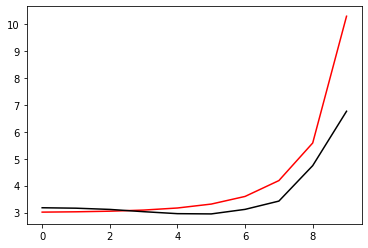

5000 0.00464859876459369
[3.1733761  3.15814768 3.11583994 3.03817483 2.96825564 2.95746976
 3.11990591 3.43169823 4.7411839  6.76386557]


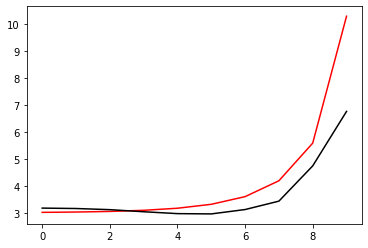

In [32]:
optimizer=tf.optimizers.Adam(learning_rate=0.00075)
for i in range (1, 5001):
    run()
    if i%100==0: print(i, Error_func(h).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

100 0.0037823773998229135
[3.13592482 3.13227138 3.11980509 3.08761599 3.03062571 3.0205326
 3.17749225 3.49129656 4.67340575 6.72377782]


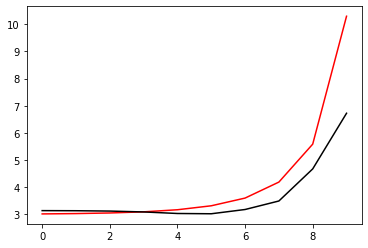

200 0.003384649098633598
[3.11922588 3.11898129 3.11577759 3.10400513 3.07706344 3.07612848
 3.22100866 3.53520739 4.60400233 6.68074457]


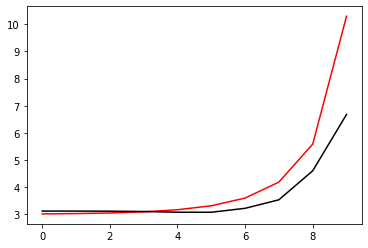

300 0.0031706547607970132
[3.10848617 3.11017362 3.11231842 3.1124069  3.107558   3.12269809
 3.25965213 3.56675917 4.5397299  6.64094095]


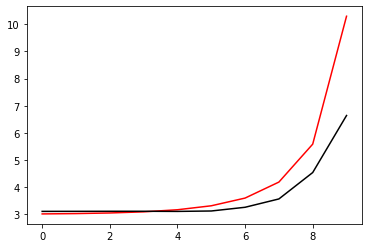

400 0.0030535237677362425
[3.10128982 3.10426685 3.10994702 3.1177851  3.12795933 3.15912163
 3.29141208 3.58862166 4.48142613 6.60485839]


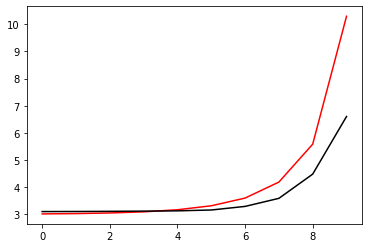

500 0.0029898547168096166
[3.09654408 3.10042614 3.10854284 3.12163206 3.14205664 3.1858726
 3.31516387 3.60262947 4.42922713 6.57256818]


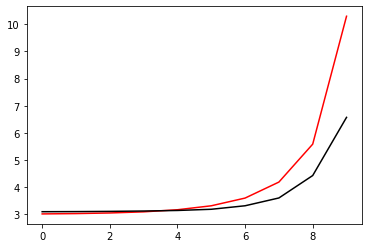

600 0.002955092368420291
[3.09356507 3.09809043 3.10789744 3.12455077 3.15184082 3.20443986
 3.33149033 3.61019961 4.38302481 6.54399653]


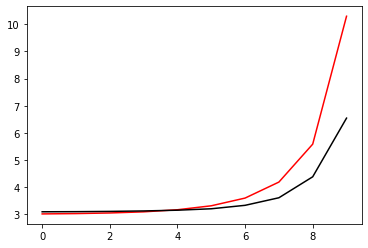

700 0.002935490205902335
[3.09185117 3.09682882 3.10778779 3.1268013  3.15851706 3.2166905
 3.34184152 3.61275275 4.34259492 6.51900024]


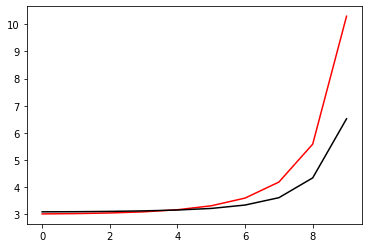

800 0.0029238549210951616
[3.09099442 3.09628747 3.10801784 3.12855023 3.16299598 3.22443653
 3.34786988 3.61179176 4.30765426 6.49740106]


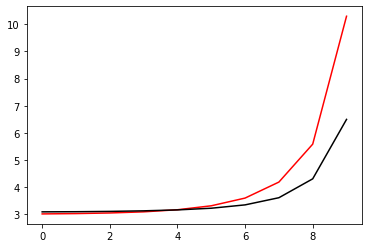

900 0.0029166395126944953
[3.09066879 3.09618292 3.10847827 3.12992592 3.16599542 3.22919846
 3.35106306 3.60874704 4.27788533 6.47900051]


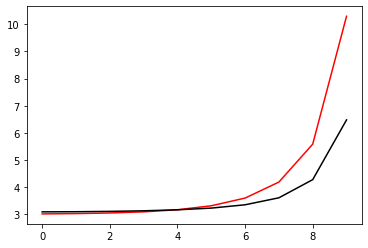

1000 0.0029120915448001845
[3.09063349 3.09630884 3.10890844 3.13102166 3.16804149 3.23211258
 3.35257615 3.6047948  4.25293943 6.46358171]


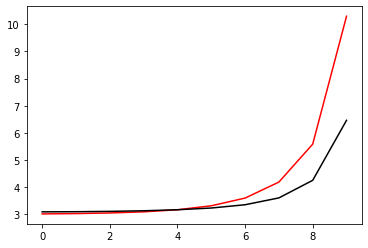

1100 0.002909261414994351
[3.09073035 3.09652527 3.10937577 3.1318987  3.16948428 3.2339419
 3.35319863 3.60076104 4.23242864 6.45090414]


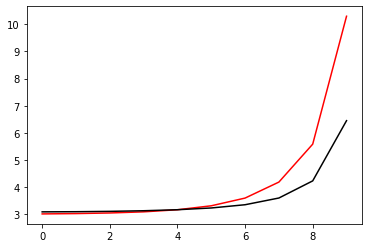

1200 0.0029075559344545524
[3.09086712 3.09675333 3.10978837 3.13259707 3.17053722 3.23514935
 3.35340639 3.59712784 4.21591922 6.44069945]


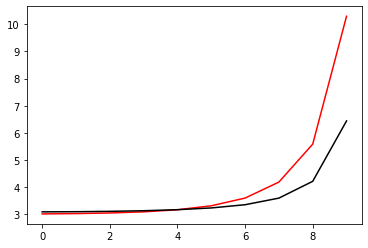

1300 0.002906573411697813
[3.09099779 3.09695702 3.10999474 3.13314542 3.17132321 3.23599144
 3.35345074 3.59410659 4.20293526 6.43267348]


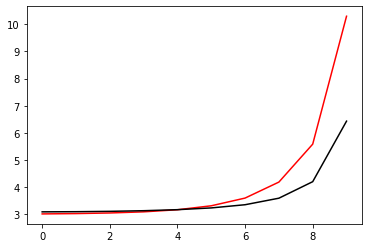

1400 0.0029060292482974517
[3.09110669 3.09711683 3.11039614 3.13356633 3.17191334 3.2366018
 3.35344624 3.59173215 4.19297399 6.42651557]


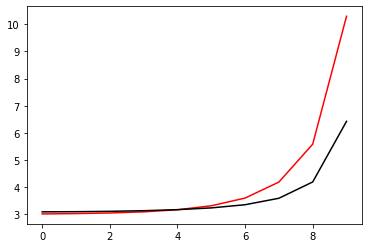

1500 0.0029057458227521584
[3.09118917 3.0972396  3.11059706 3.13388202 3.17235217 3.23705002
 3.35343504 3.58994419 4.18552844 6.42191253]


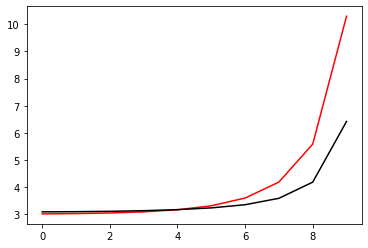

1600 0.002905605255696276
[3.09124888 3.09732881 3.11074369 3.13411225 3.17267212 3.23737652
 3.35342832 3.58864426 4.18011255 6.41856404]


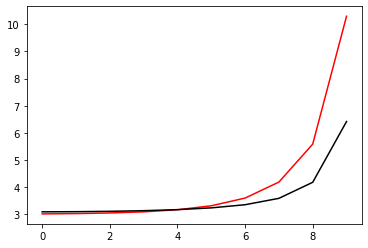

1700 0.002905539270561797
[3.09129058 3.09739149 3.11084723 3.1342754  3.17289941 3.2376093
 3.35342627 3.58772806 4.17628258 6.4161959 ]


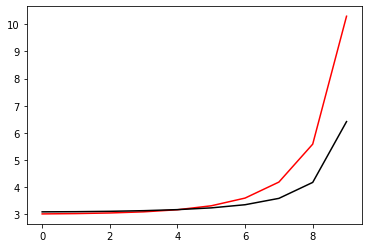

1800 0.0029055100113042883
[3.09131884 3.09743426 3.11091754 3.13438764 3.17305622 3.23777061
 3.35342677 3.58710114 4.17365202 6.41456925]


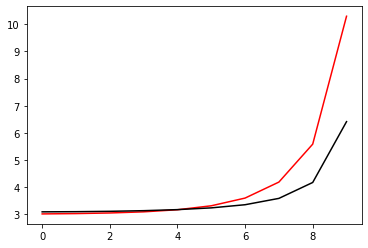

1900 0.0029054977817483487
[3.09133747 3.09746256 3.1109655  3.13446251 3.1731611  3.23787888
 3.35342812 3.58668467 4.17189903 6.41348518]


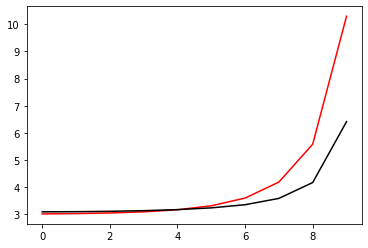

2000 0.002905492975009313
[3.09134941 3.09748078 3.11099595 3.1345109  3.173229   3.23794918
 3.35342948 3.58641631 4.17076691 6.412785  ]


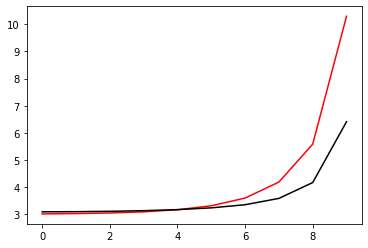

2100 0.0029054912030307637
[3.09135684 3.09749213 3.11101498 3.13454116 3.17327151 3.23799327
 3.35343052 3.58624882 4.17005919 6.41234727]


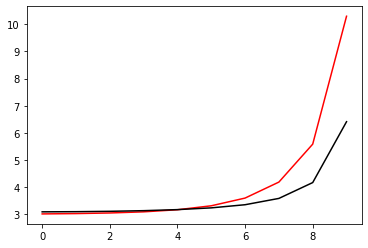

2200 0.002905490598087341
[3.09136125 3.09749921 3.11101962 3.13455948 3.17329723 3.23801998
 3.35343123 3.58614771 4.16963158 6.41208276]


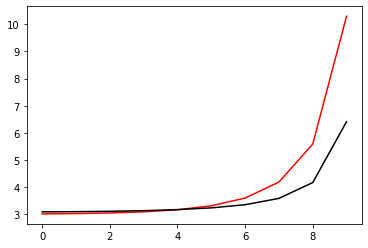

2300 0.0029054903957483006
[3.09136391 3.09750296 3.11103316 3.13457012 3.17331223 3.23803557
 3.35343167 3.58608878 4.16938221 6.41192849]


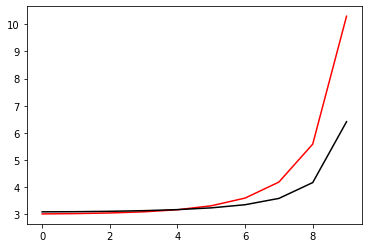

2400 0.002905490337126931
[3.09136537 3.0975052  3.11103693 3.13457612 3.17332067 3.23804433
 3.35343192 3.58605568 4.1692421  6.41184181]


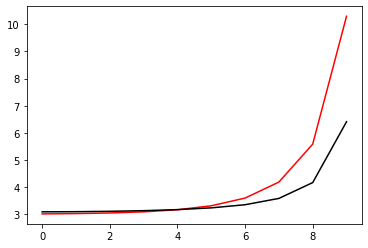

2500 0.0029054903209167664
[3.09136616 3.09750641 3.11103896 3.13457936 3.17332523 3.23804907
 3.35343206 3.5860378  4.1691664  6.41179497]


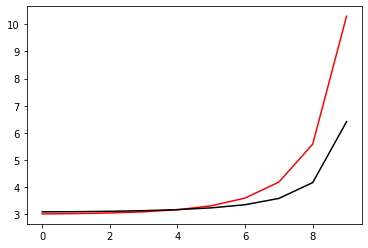

2600 0.0029054903167939853
[3.09136657 3.09750704 3.11104001 3.13458104 3.17332759 3.23805153
 3.35343214 3.58602853 4.16912714 6.41177067]


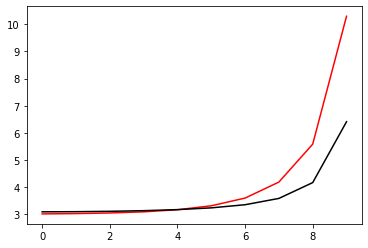

2700 0.0029054903180624325
[3.09136672 3.09750753 3.11103635 3.13458189 3.17332876 3.23805275
 3.35343217 3.58602393 4.16910764 6.41175861]


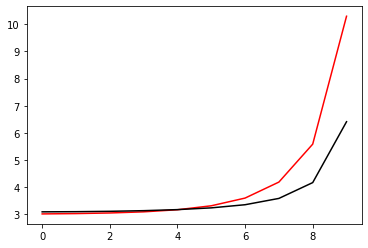

2800 0.0029054903156312114
[3.09136687 3.0975075  3.1110408  3.13458227 3.17332932 3.23805333
 3.35343219 3.58602174 4.16909839 6.41175288]


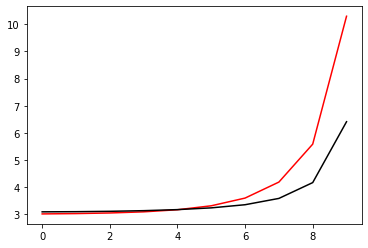

2900 0.0029054903155761513
[3.09136691 3.09750757 3.1110409  3.13458245 3.17332957 3.23805359
 3.3534322  3.58602075 4.16909421 6.41175029]


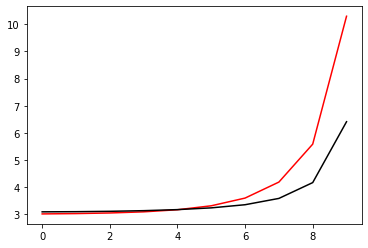

3000 0.0029054903155697836
[3.09136693 3.0975076  3.11104095 3.13458252 3.17332968 3.2380537
 3.3534322  3.58602033 4.16909241 6.41174918]


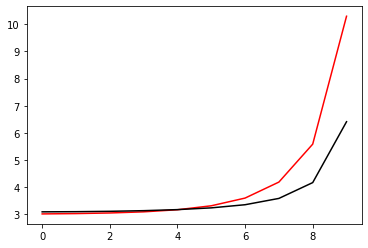

3100 0.002905490319084556
[3.09136682 3.09750791 3.11103577 3.13458258 3.17332972 3.23805375
 3.3534322  3.58602015 4.16909167 6.41174872]


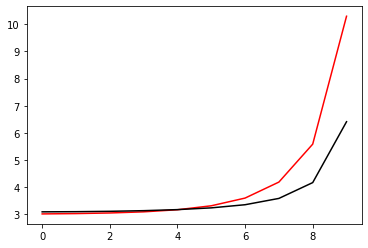

3200 0.0029054903155920145
[3.09136693 3.09750764 3.11104051 3.13458257 3.17332974 3.23805377
 3.3534322  3.58602009 4.1690914  6.41174855]


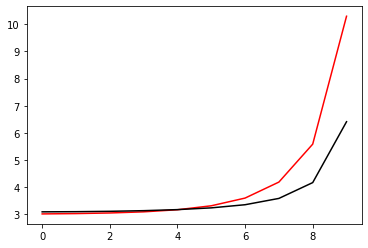

3300 0.002905490315554922
[3.09136694 3.09750761 3.11104097 3.13458257 3.17332975 3.23805377
 3.35343221 3.58602006 4.16909129 6.41174849]


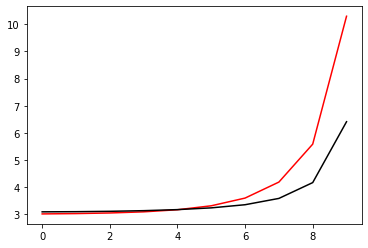

3400 0.0029054903155632883
[3.09136694 3.09750761 3.11104098 3.13458257 3.17332975 3.23805378
 3.35343221 3.58602005 4.16909126 6.41174847]


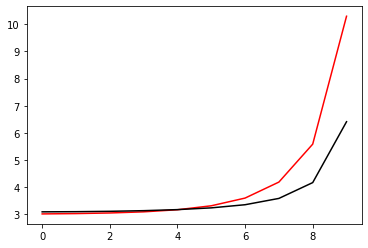

3500 0.0029054903155705677
[3.09136694 3.09750761 3.11104098 3.13458257 3.17332975 3.23805378
 3.35343221 3.58602005 4.16909125 6.41174846]


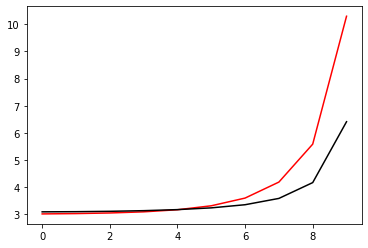

3600 0.0029054903217984418
[3.09136681 3.09750815 3.11103412 3.13458263 3.17332975 3.23805377
 3.35343219 3.58602005 4.16909125 6.41174846]


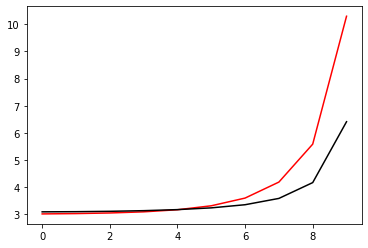

3700 0.002905490315570422
[3.09136694 3.09750761 3.11104102 3.13458257 3.17332975 3.23805378
 3.35343221 3.58602005 4.16909124 6.41174846]


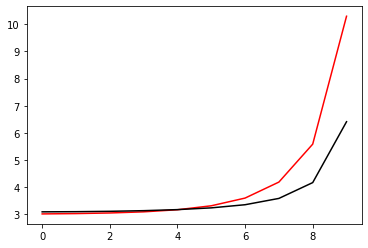

3800 0.0029054903155704558
[3.09136694 3.09750761 3.11104098 3.13458257 3.17332975 3.23805378
 3.35343221 3.58602005 4.16909124 6.41174846]


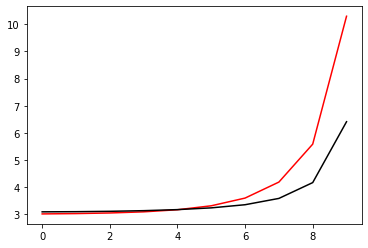

3900 0.0029054903155745684
[3.09136694 3.09750761 3.11104098 3.13458257 3.17332975 3.23805378
 3.35343221 3.58602005 4.16909124 6.41174846]


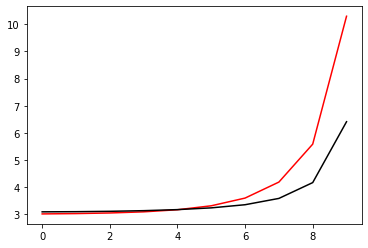

4000 0.0029054907452239946
[3.09136559 3.09751333 3.11098479 3.13458309 3.17332969 3.23805373
 3.35343203 3.58601999 4.1690912  6.41174846]


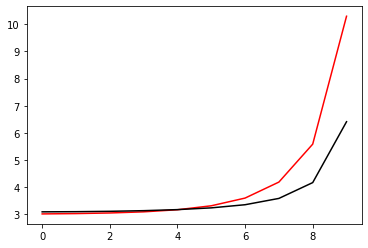

4100 0.0029054903156232625
[3.09136692 3.09750768 3.11104035 3.13458258 3.17332975 3.23805378
 3.3534322  3.58602005 4.16909125 6.41174846]


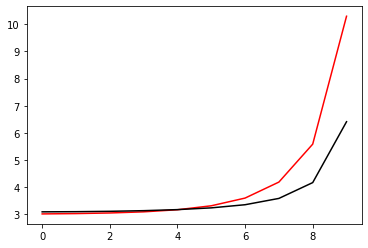

4200 0.0029054903155629015
[3.09136694 3.09750761 3.11104097 3.13458257 3.17332975 3.23805378
 3.35343221 3.58602005 4.16909124 6.41174846]


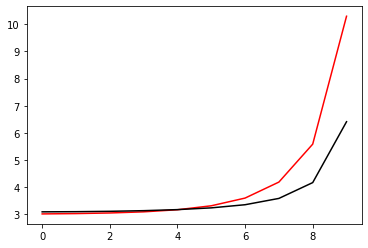

4300 0.0029054903155695884
[3.09136694 3.09750761 3.11104098 3.13458257 3.17332975 3.23805378
 3.35343221 3.58602005 4.16909124 6.41174846]


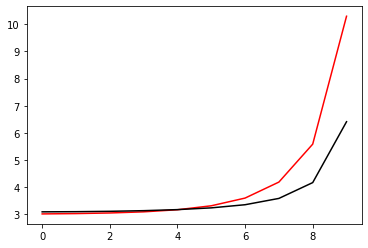

4400 0.0029054903155746135
[3.09136694 3.09750761 3.11104098 3.13458257 3.17332975 3.23805378
 3.35343221 3.58602005 4.16909124 6.41174846]


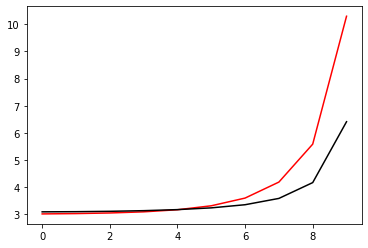

4500 0.0029054903155653527
[3.09136695 3.09750756 3.11104134 3.13458257 3.17332975 3.23805378
 3.35343221 3.58602005 4.16909125 6.41174846]


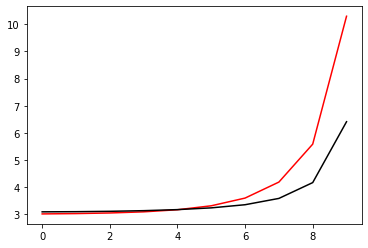

4600 0.002905490315564304
[3.09136694 3.09750762 3.11104095 3.13458257 3.17332975 3.23805378
 3.35343221 3.58602005 4.16909124 6.41174846]


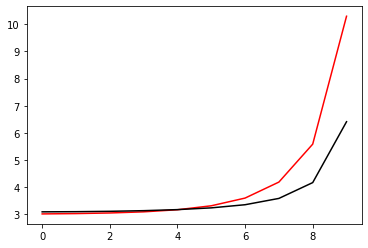

4700 0.002905490315572146
[3.09136694 3.09750761 3.11104098 3.13458257 3.17332975 3.23805378
 3.35343221 3.58602005 4.16909124 6.41174846]


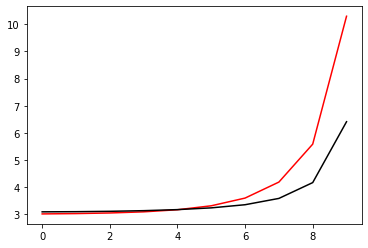

4800 0.0029054903155632827
[3.09136694 3.09750761 3.11104098 3.13458257 3.17332975 3.23805378
 3.35343221 3.58602005 4.16909124 6.41174846]


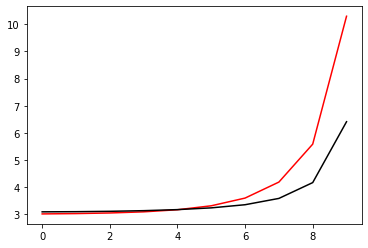

4900 0.0029054904576551917
[3.09136552 3.09751473 3.11101121 3.13458307 3.17332971 3.23805375
 3.35343208 3.58602002 4.16909122 6.41174847]


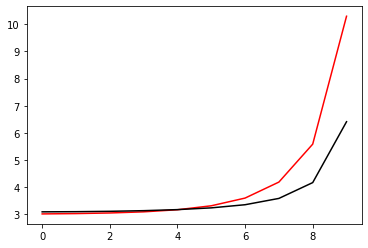

5000 0.0029054903155537543
[3.09136695 3.09750757 3.11104119 3.13458257 3.17332975 3.23805378
 3.35343221 3.58602005 4.16909124 6.41174846]


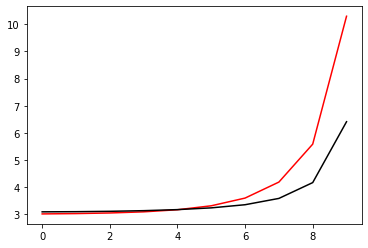

In [33]:
optimizer=tf.optimizers.Adam(learning_rate=0.00065)
for i in range (1, 5001):
    run()
    if i%100==0: print(i, Error_func(h).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

100 0.12685490495008006
[3.09127566 3.09738069 3.11085014 3.13430937 3.17297942 3.23769302
 3.35335542 3.58732277 4.17679812 6.46162695]


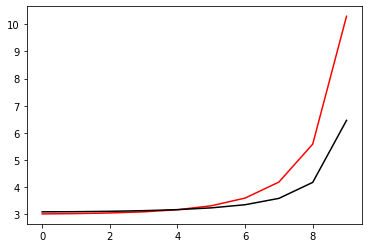

200 0.12341009774503017
[3.09115573 3.09728288 3.11061651 3.13406347 3.17261008 3.23733126
 3.35328424 3.58864794 4.18456476 6.51116813]


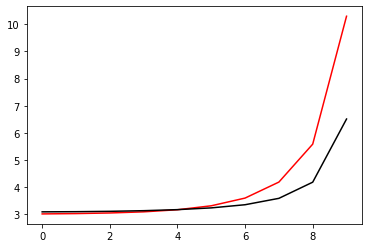

300 0.12003808192752408
[3.09108661 3.09712425 3.11046714 3.13376222 3.17227625 3.23698625
 3.3532236  3.58998362 4.19229312 6.56037058]


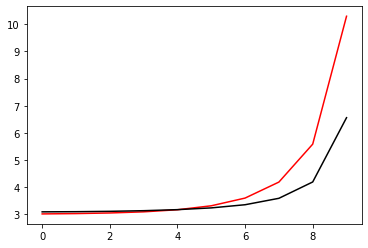

400 0.1167372588361917
[3.09099391 3.09699224 3.11027996 3.13348917 3.17193416 3.23664098
 3.35317001 3.59131637 4.19998046 6.60924306]


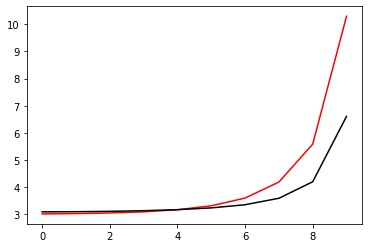

500 0.11350608591210774
[3.09084724 3.09691765 3.11003028 3.13327384 3.17155136 3.23632351
 3.35310622 3.59264435 4.20762668 6.6577941 ]


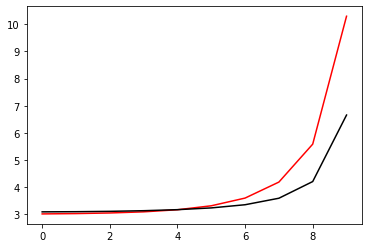

600 0.11034306791967796
[3.09079809 3.09673592 3.10989764 3.13295776 3.17125573 3.23597137
 3.3530827  3.59398935 4.21525346 6.70603198]


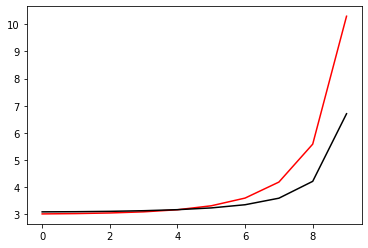

700 0.10724678146460886
[3.09072983 3.09657399 3.10974159 3.13265946 3.17095844 3.23560592
 3.35307512 3.5953314  4.22284694 6.75396469]


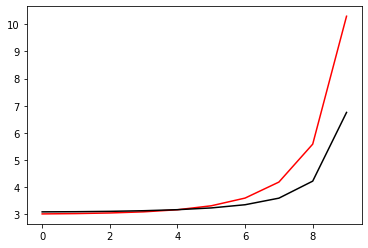

800 0.10421584266958495
[3.09060122 3.09647541 3.10952067 3.13243152 3.17059486 3.23532423
 3.35302496 3.59667506 4.23040239 6.80159998]


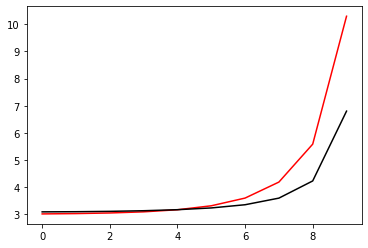

900 0.10124892926137548
[3.09050155 3.0963446  3.10933292 3.13217135 3.17026981 3.23500953
 3.35300663 3.59802309 4.23793352 6.8489453 ]


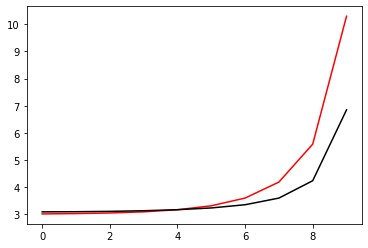

1000 0.09834476593981105
[3.09039987 3.09621457 3.1091446  3.13191412 3.16994748 3.23470125
 3.35299445 3.59937416 4.2454362  6.89600782]


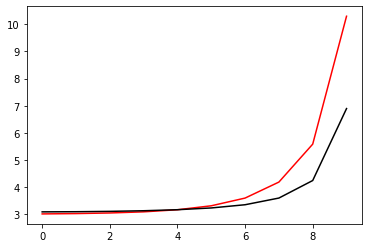

1100 0.09550212821634087
[3.09029998 3.09608155 3.1089593  3.13165627 3.16963097 3.23439657
 3.35299096 3.60072943 4.25291319 6.94279442]


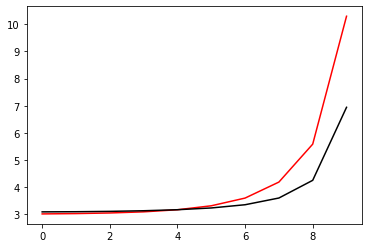

1200 0.09271983997699924
[3.0902019  3.09594262 3.10878076 3.13138879 3.1693294  3.23407763
 3.3530044  3.60208239 4.26036311 6.9893117 ]


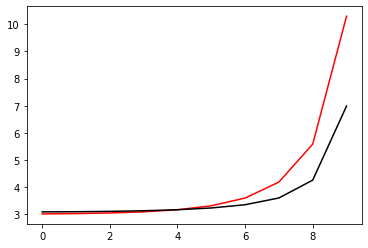

1300 0.08999677156185962
[3.09009479 3.09581723 3.10858729 3.13114852 3.1690059  3.23380554
 3.35300244 3.60345021 4.2677893  7.03556594]


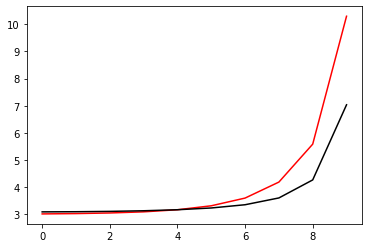

1400 0.08733183903553844
[3.08999117 3.09568429 3.10840211 3.1308971  3.16869853 3.23351806
 3.35301832 3.60481643 4.27519096 7.08156314]


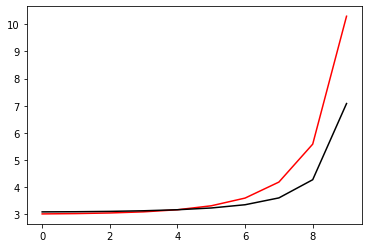

1500 0.08472400187179559
[3.08988603 3.09555094 3.10821767 3.13064559 3.1683965  3.23323137
 3.35304289 3.60618396 4.2825681  7.12730896]


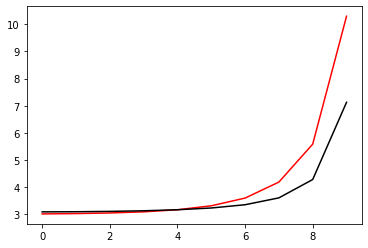

1600 0.08217226178107187
[3.08978123 3.09541749 3.10803286 3.13039947 3.16809373 3.23295873
 3.35306981 3.60756005 4.2899239  7.17280879]


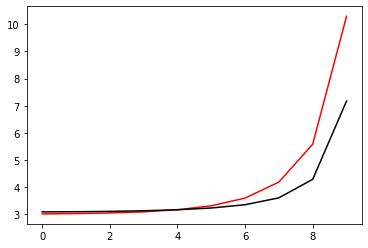

1700 0.0796756610851369
[3.08967505 3.09528348 3.10784883 3.13015309 3.16779617 3.23268679
 3.35310537 3.60893787 4.29725716 7.21806769]


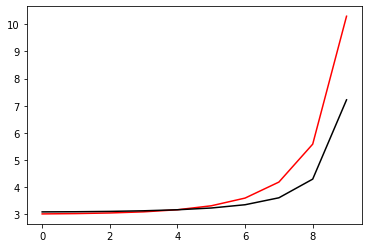

1800 0.07723328137648988
[3.08955136 3.09516485 3.10765008 3.12992063 3.16749003 3.23242644
 3.3531381  3.61031345 4.3045631  7.2630904 ]


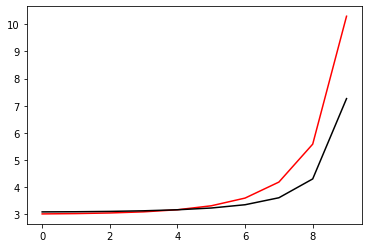

1900 0.07484424080471093
[3.08946037 3.09501427 3.10748206 3.12966515 3.16721073 3.23215807
 3.35319578 3.61170524 4.31185909 7.30788136]


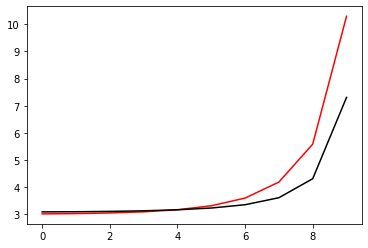

2000 0.07250769478214722
[3.08935178 3.09487912 3.10729917 3.12942353 3.16692266 3.23190111
 3.35325058 3.61309504 4.31912943 7.35244467]


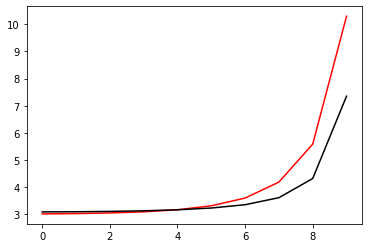

2100 0.07022283214943151
[3.08923988 3.09474614 3.10711419 3.12918571 3.16663556 3.23165064
 3.35331009 3.6144884  4.32637917 7.39678414]


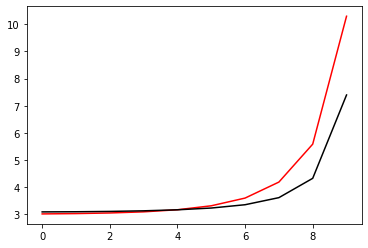

2200 0.06798887472507684
[3.08913283 3.09460725 3.10693499 3.12894479 3.16635599 3.23140222
 3.35337893 3.61588711 4.33361006 7.44090324]


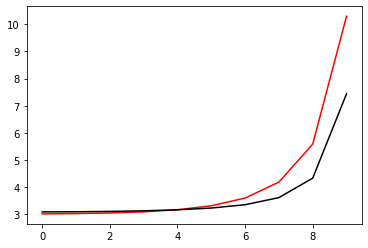

2300 0.06580507556088336
[3.08902154 3.09447127 3.10675293 3.12870786 3.16607701 3.23115962
 3.35345254 3.61728869 4.34082152 7.48480513]


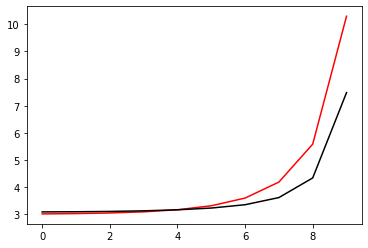

2400 0.06367071735418826
[3.08890996 3.09433455 3.10657158 3.12847229 3.16580115 3.23092204
 3.35353227 3.61869481 4.34801422 7.52849264]


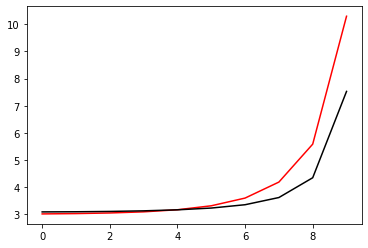

2500 0.06158511172392328
[3.0887727  3.09422452 3.10636349 3.12826835 3.16549814 3.23072395
 3.35358823 3.62011496 4.35518027 7.57196828]


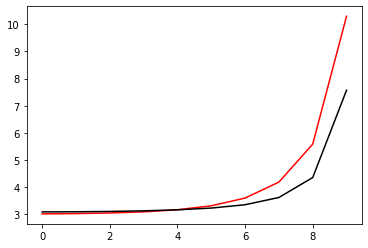

2600 0.05954759378481887
[3.08868453 3.0940601  3.10620998 3.12800573 3.16525837 3.23046113
 3.35370989 3.62151892 4.36234321 7.61523426]


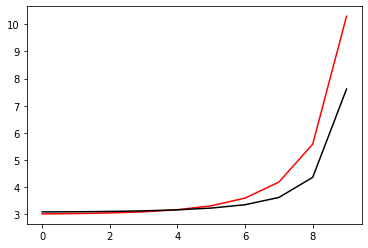

2700 0.05755752843561512
[3.08857081 3.09392223 3.10602979 3.12777453 3.16499144 3.23023759
 3.35380787 3.62293715 4.36948063 7.65829243]


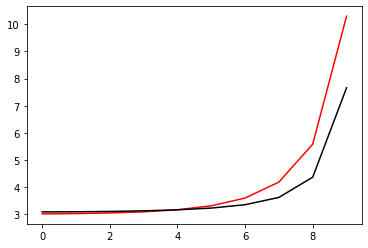

2800 0.05561430109318481
[3.08845632 3.09378408 3.10584991 3.12754486 3.16472736 3.23001873
 3.35391176 3.62435934 4.37659985 7.70114434]


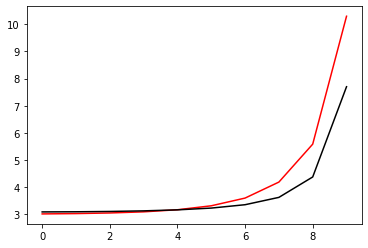

2900 0.05371732027678606
[3.08835557 3.09363274 3.10568248 3.12730887 3.16447311 3.2298055
 3.35402369 3.62579918 4.38370459 7.74379124]


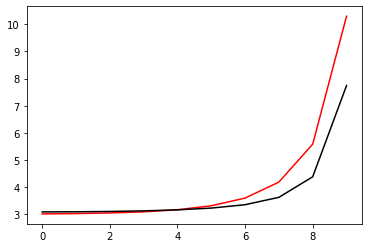

3000 0.051866014660148806
[3.08822537 3.09350675 3.10549142 3.1270899  3.16420803 3.22959475
 3.35413719 3.62721511 4.3907833  7.78623401]


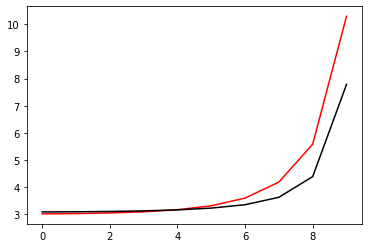

3100 0.050059833101670836
[3.08810879 3.09336769 3.10531263 3.12686463 3.16395256 3.22938961
 3.35425866 3.62864881 4.39784816 7.82847324]


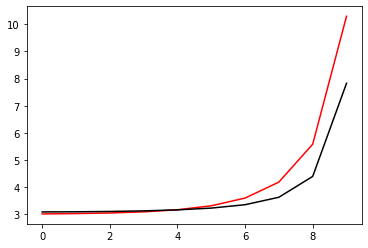

3200 0.04829824181936436
[3.08799162 3.09322826 3.10513431 3.12664077 3.16370001 3.22918894
 3.35438592 3.63008621 4.40489476 7.87050918]


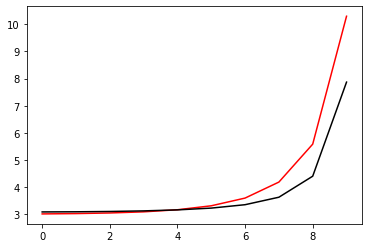

3300 0.04658072377710967
[3.08788005 3.09308324 3.10496136 3.12641567 3.16345268 3.22899475
 3.35451812 3.63153557 4.41192372 7.91234178]


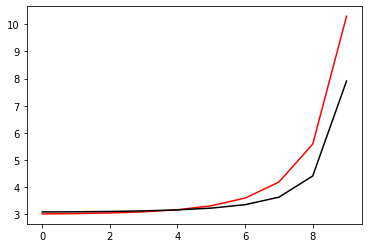

3400 0.044906777071337375
[3.0877555  3.09294855 3.10477902 3.12619746 3.16320357 3.22880103
 3.35465743 3.6329714  4.4189317  7.95397064]


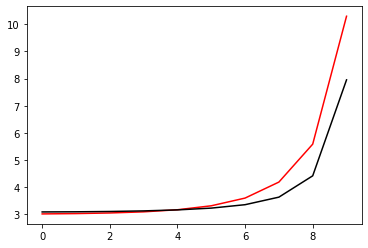

3500 0.04327591386649002
[3.08763642 3.09280838 3.10460189 3.12597803 3.16295952 3.22861373
 3.35480164 3.63441918 4.42592229 7.99539504]


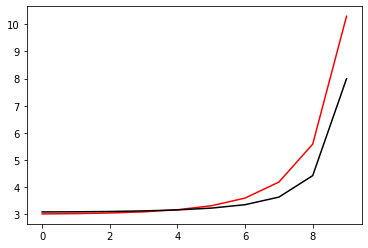

3600 0.04168765887638699
[3.08751683 3.09266791 3.10442527 3.12576002 3.16271834 3.22843082
 3.3549514  3.63587022 4.43289361 8.03661394]


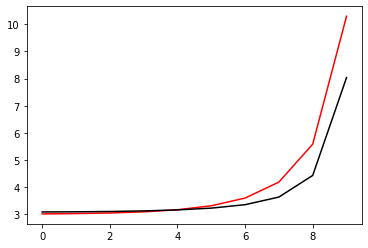

3700 0.04014154825882482
[3.08738978 3.09253277 3.10424454 3.12554428 3.16248043 3.22824485
 3.35511121 3.63730852 4.43984316 8.07762596]


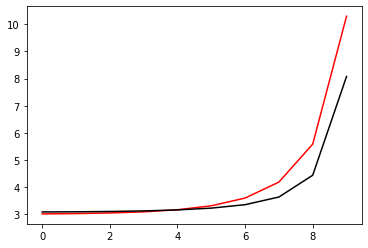

3800 0.038637128215021146
[3.08727601 3.09238642 3.10407347 3.12532857 3.16224453 3.22807814
 3.35526715 3.63878096 4.44677602 8.11842939]


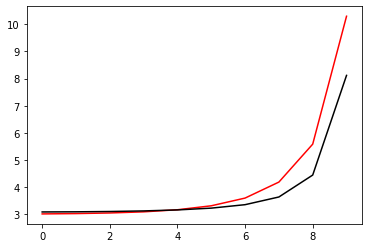

3900 0.03717395406193831
[3.08715485 3.09224535 3.10389832 3.12511503 3.16201186 3.22790831
 3.35543314 3.64024072 4.45368695 8.15902218]


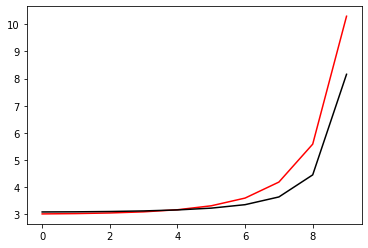

4000 0.03575158878622432
[3.08703318 3.09210415 3.10372365 3.12490302 3.16178201 3.2277428
 3.35560439 3.64170298 4.46057665 8.19940196]


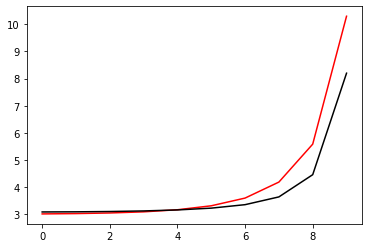

4100 0.0343696022611474
[3.0868991  3.09197682 3.10353499 3.12471053 3.16153703 3.22760398
 3.35576091 3.64318544 4.46743837 8.23956598]


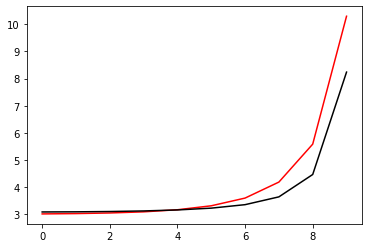

4200 0.03302756892884106
[3.08678842 3.09182157 3.10337596 3.12448379 3.16133082 3.22742464
 3.35596218 3.64463372 4.47428884 8.27951118]


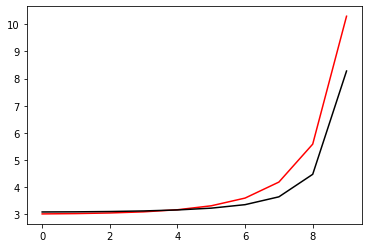

4300 0.03172506899725134
[3.08666557 3.09167999 3.10320308 3.12427636 3.16110956 3.22727191
 3.3561488  3.6461023  4.48111083 8.31923412]


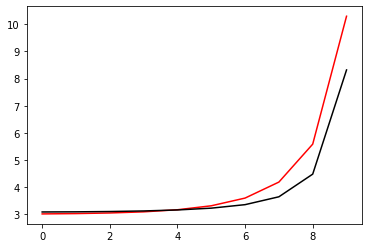

4400 0.030461685054583652
[3.08654224 3.09153846 3.10303073 3.1240706  3.16089108 3.22712342
 3.35634032 3.64757238 4.4879086  8.35873101]


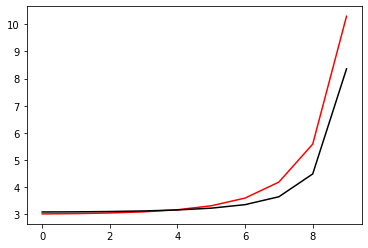

4500 0.029237002157799452
[3.08641857 3.09139693 3.10285902 3.12386645 3.16067546 3.22697914
 3.35653668 3.64904375 4.49468128 8.39799769]


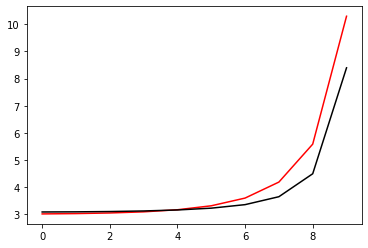

4600 0.028050606563162574
[3.08629266 3.09125759 3.10268596 3.12366628 3.16046054 3.22684147
 3.35673533 3.65051715 4.50142616 8.43702964]


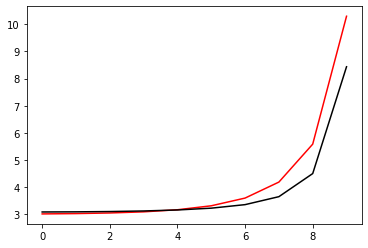

4700 0.02690208465770588
[3.08617039 3.09111405 3.10251771 3.12346319 3.1602529  3.2267031
 3.35694336 3.65198873 4.50814646 8.47582193]


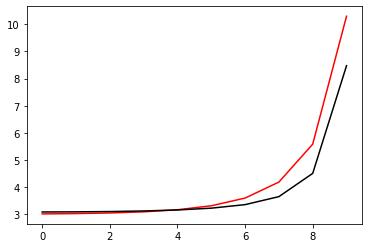

4800 0.025791021998564603
[3.08604594 3.09097269 3.10234814 3.12326401 3.16004594 3.22657128
 3.35715365 3.65346212 4.51483768 8.51436925]


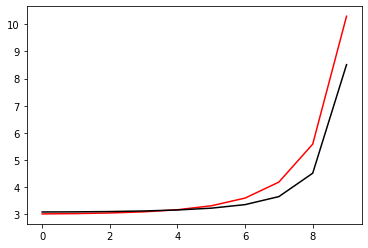

4900 0.024717002273420708
[3.08592129 3.09083148 3.10217933 3.12306656 3.15984186 3.22644358
 3.35736835 3.65493547 4.5214994  8.55266591]


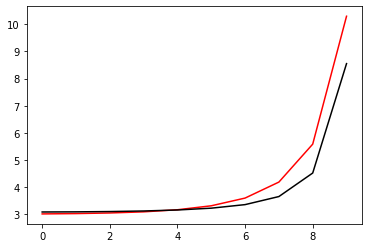

5000 0.023679606923526022
[3.08577634 3.09071289 3.10198802 3.12289864 3.15961238 3.22635404
 3.35755687 3.65643283 4.52812048 8.59070576]


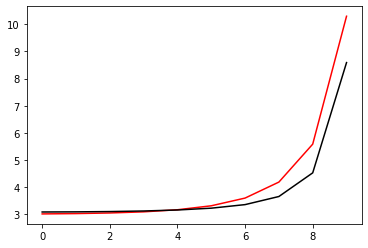

5100 0.022678411210350587
[3.08567183 3.09054949 3.10184445 3.12267689 3.15944265 3.22620038
 3.35781036 3.65788026 4.53472831 8.62848228]


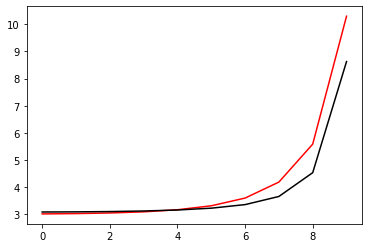

5200 0.021712989139325407
[3.08554664 3.09040915 3.10167802 3.12248492 3.15924726 3.22608484
 3.35803754 3.65935095 4.54129346 8.66598846]


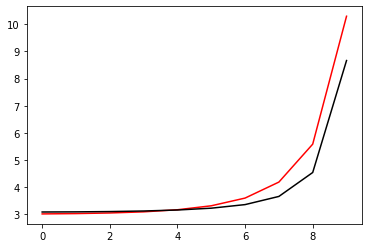

5300 0.0207829066147278
[3.08542167 3.09026891 3.10151271 3.12229466 3.15905495 3.2259733
 3.35826863 3.6608201  4.54782346 8.70321687]


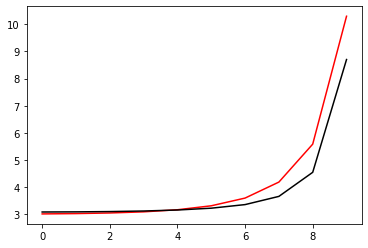

5400 0.019887723435072325
[3.0852967  3.09012907 3.10134836 3.12210632 3.15886559 3.22586574
 3.35850344 3.66228703 4.55431663 8.74015961]


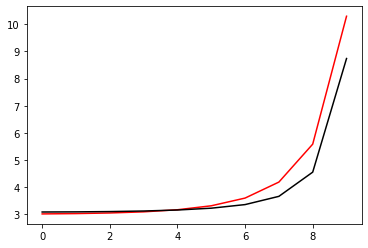

5500 0.019026991764097625
[3.08517096 3.08999066 3.10118412 3.12192115 3.15867808 3.22576349
 3.35874038 3.66375172 4.56076994 8.77680829]


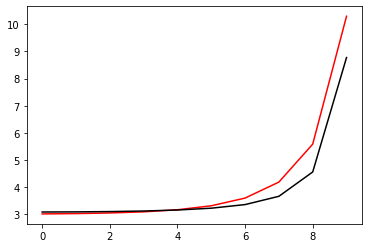

5600 0.018200255166083583
[3.08504722 3.08985064 3.10102299 3.12173545 3.15849602 3.22566232
 3.35898349 3.6652118  4.56718458 8.81315401]


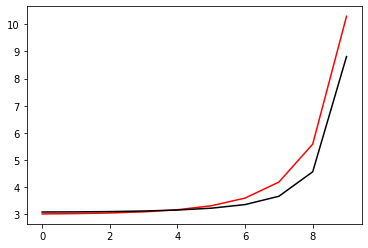

5700 0.01740704769538189
[3.08492271 3.08971217 3.10086193 3.12155299 3.15831574 3.22556644
 3.35922855 3.66666896 4.57355644 8.84918739]


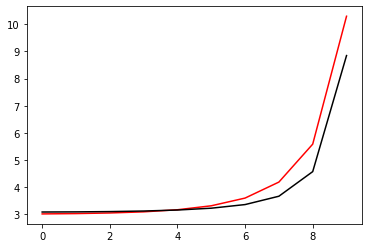

5800 0.016646892955457435
[3.08479847 3.08957428 3.10070206 3.12137259 3.15813853 3.22547438
 3.35947666 3.66812169 4.57988388 8.88489847]


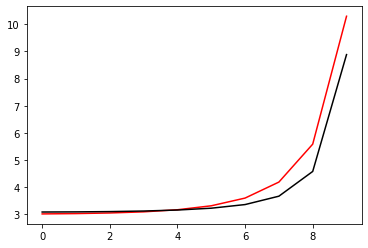

5900 0.01591930359769182
[3.08469121 3.08941864 3.10056304 3.12117073 3.15798934 3.2253557
 3.35975501 3.66954415 4.5861724  8.92027677]


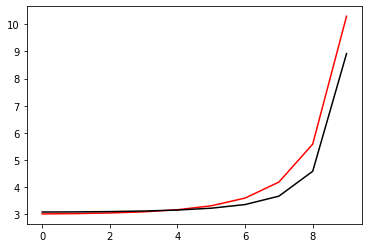

6000 0.015223778293132855
[3.08455096 3.08930068 3.10038611 3.12101833 3.15779332 3.22530162
 3.35998098 3.67101088 4.59239583 8.95531122]


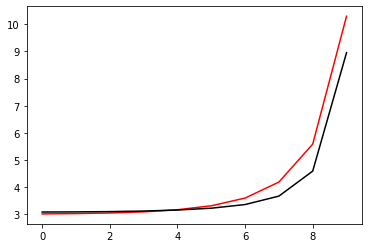

6100 0.014559805016178866
[3.08442802 3.0891648  3.1002303  3.1208443  3.15762551 3.22522074
 3.36023708 3.67244642 4.5985766  8.98999016]


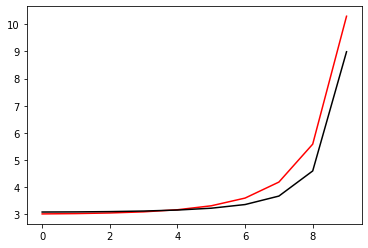

6200 0.013926855942762755
[3.08430548 3.08902988 3.10007582 3.12067263 3.15746076 3.22514356
 3.36049533 3.67387479 4.60470352 9.02430131]


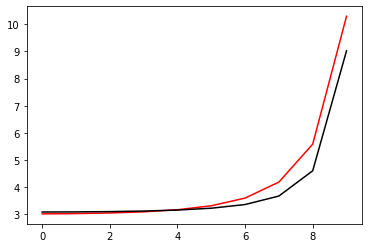

6300 0.013324388654846255
[3.08418353 3.08889591 3.09992284 3.12050331 3.15729918 3.22507001
 3.36075553 3.67529521 4.61077397 9.05823177]


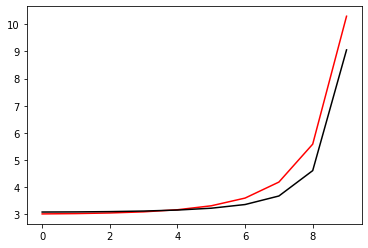

6400 0.012751844842842084
[3.08406323 3.08876202 3.09977249 3.12033538 3.15714192 3.22499878
 3.36101834 3.67670575 4.61678475 9.09176796]


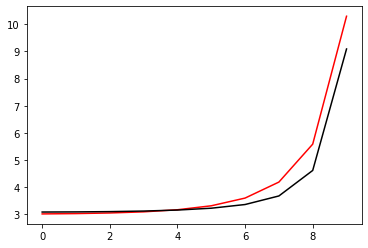

6500 0.012208649423395713
[3.08394185 3.08863104 3.09962182 3.12017188 3.15698573 3.22493343
 3.36128064 3.67810856 4.62273342 9.12489565]


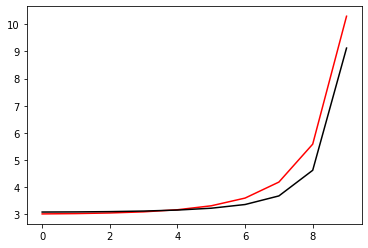

6600 0.011694209719663048
[3.08382222 3.08850027 3.09947385 3.12000985 3.15683389 3.22487033
 3.3615452  3.67950013 4.62861721 9.15759988]


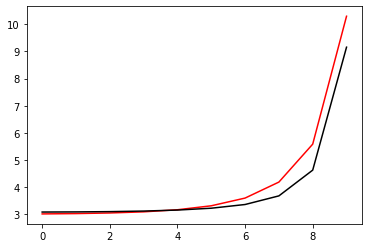

6700 0.011207914647509525
[3.08370351 3.08837075 3.0993277  3.1198504  3.15668532 3.22481062
 3.36181063 3.68088026 4.63443252 9.189865  ]


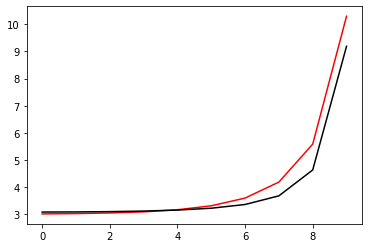

6800 0.010749134117967424
[3.08357133 3.08825659 3.09917054 3.11970398 3.15653166 3.22475714
 3.36207367 3.68223886 4.64017258 9.22167463]


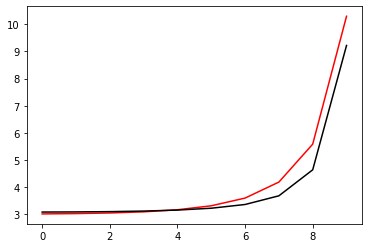

6900 0.010317217488815578
[3.0834694  3.08811578 3.09904136 3.11953948 3.15639833 3.22470092
 3.36234282 3.68360179 4.6458434  9.25301164]


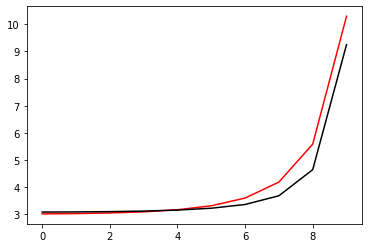

7000 0.009911494560834939
[3.08335396 3.08799065 3.09890109 3.11938829 3.15625973 3.22465105
 3.36260891 3.68494161 4.65143248 9.28385812]


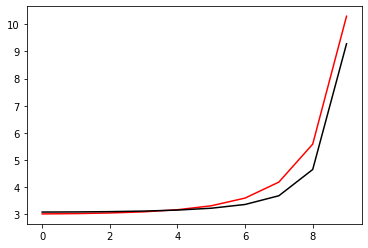

7100 0.009531273357587888
[3.08323993 3.08786706 3.0987631  3.11923987 3.15612465 3.22460418
 3.36287469 3.68626574 4.65693873 9.31419544]


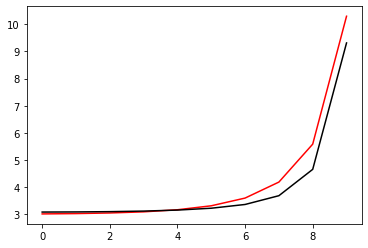

7200 0.009175840467272649
[3.08312808 3.08774443 3.09862813 3.1190937  3.15599367 3.22455982
 3.36314012 3.68757305 4.66235831 9.34400418]


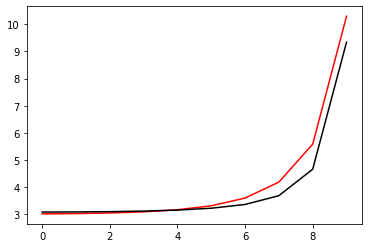

7300 0.008844460512766054
[3.08301615 3.08762546 3.09849386 3.11895248 3.15586438 3.22452023
 3.3634025  3.68886288 4.66768551 9.37326416]


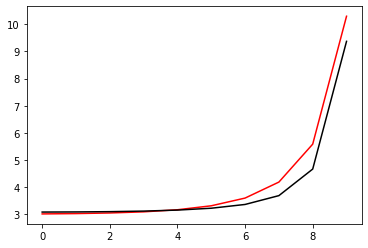

7400 0.008536375906451068
[3.08290688 3.08750717 3.09836331 3.11881269 3.15574035 3.2244813
 3.36366561 3.69013202 4.67291891 9.40195448]


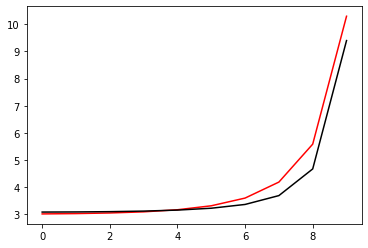

7500 0.008250806791919809
[3.08279922 3.08739116 3.09823506 3.11867658 3.15561932 3.22444602
 3.36392595 3.69138156 4.67805238 9.43005349]


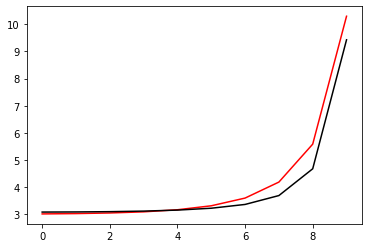

7600 0.007986951162544744
[3.08269344 3.08727734 3.09810952 3.11854376 3.15550189 3.22441341
 3.36418393 3.69260921 4.68308156 9.4575389 ]


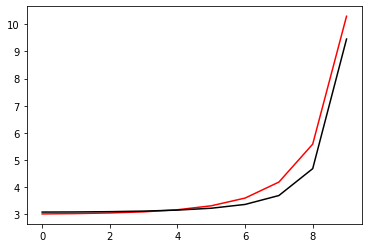

7700 0.007743985199809997
[3.08259017 3.08716531 3.0979873  3.11841388 3.15538852 3.22438306
 3.36443939 3.69381358 4.68800183 9.48438774]


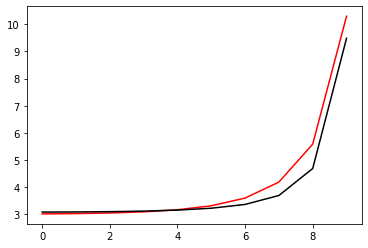

7800 0.007521063871012532
[3.08248746 3.08705734 3.09786664 3.11828868 3.15527793 3.22435551
 3.36469107 3.69499219 4.69280727 9.51057651]


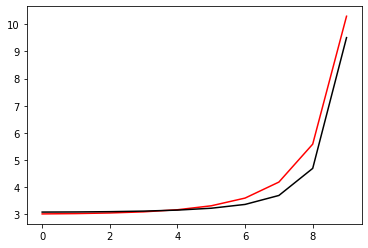

7900 0.0073173218020717214
[3.08238865 3.08695027 3.09775037 3.11816609 3.15517163 3.22433062
 3.3649391  3.69614645 4.69749491 9.53608123]


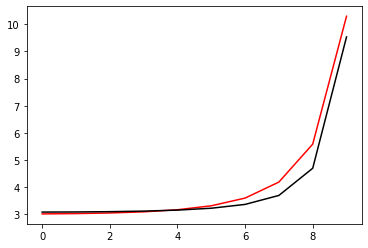

8000 0.007131874501679578
[3.08229165 3.08684642 3.09763682 3.11804739 3.155069   3.22430772
 3.36518319 3.69727242 4.70205871 9.56087752]


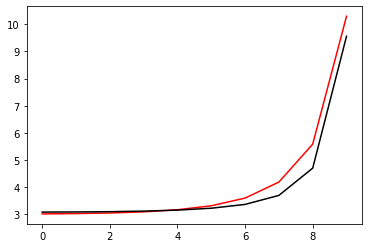

8100 0.006963819937695558
[3.08219716 3.08674538 3.09752657 3.11793247 3.15497015 3.22428699
 3.36542264 3.6983693  4.70649365 9.58494081]


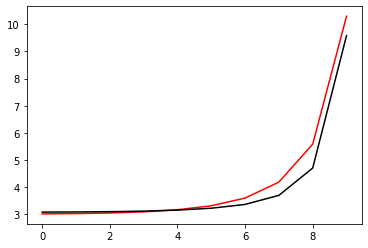

8200 0.00681224353143535
[3.08204843 3.08670453 3.09736442 3.11787307 3.1548279  3.22430529
 3.36562489 3.69943718 4.71078252 9.60824643]


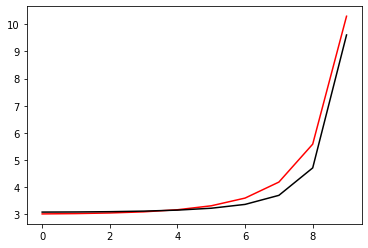

8300 0.006676205520111816
[3.08201561 3.08655298 3.09731583 3.11771501 3.15478337 3.22425209
 3.36588503 3.70046961 4.71495574 9.63076984]


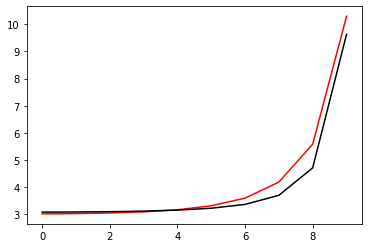

8400 0.006554773956663755
[3.08193011 3.08646047 3.09721684 3.11761134 3.1546967  3.22423664
 3.36610824 3.70147004 4.7189739  9.65248684]


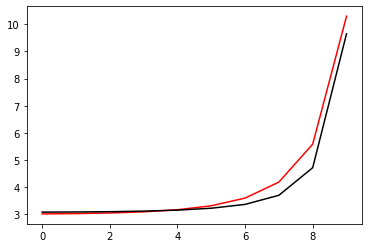

8500 0.006446997982164621
[3.08184698 3.08637195 3.09712096 3.11751245 3.15461334 3.22422344
 3.36632439 3.70243561 4.7228429  9.67337386]


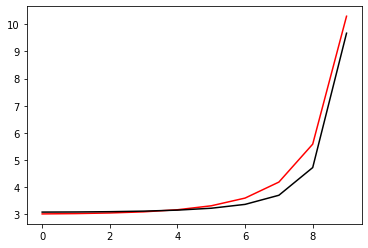

8600 0.006351926762861766
[3.08176699 3.08628687 3.09702896 3.11741779 3.15453392 3.22421183
 3.36653353 3.70336471 4.72655821 9.69340826]


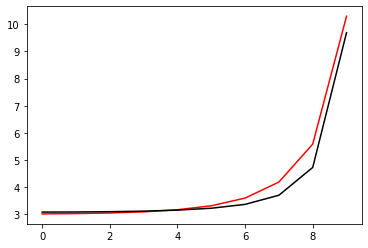

8700 0.00626861149229256
[3.08171683 3.08617909 3.09696638 3.11730444 3.15447936 3.22418613
 3.36674927 3.70425674 4.73012097 9.71256863]


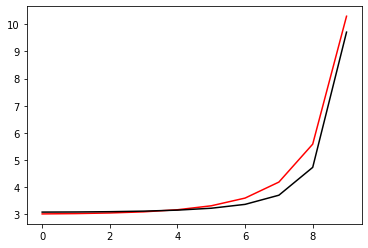

8800 0.006196107096293041
[3.08161734 3.08612717 3.09685738 3.1172412  3.15438725 3.22419268
 3.36692905 3.7051079  4.73350967 9.73083523]


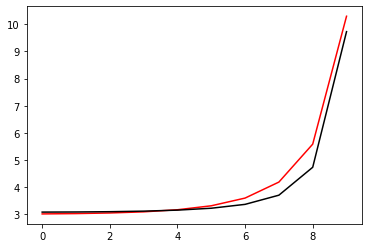

8900 0.006133483828455501
[3.08154713 3.08605342 3.09677726 3.11715995 3.15431947 3.22418532
 3.36711439 3.70591975 4.7367382  9.74819037]


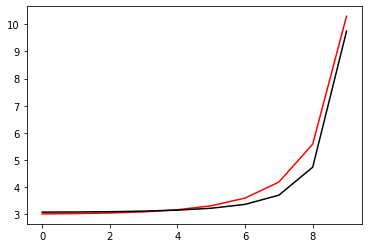

9000 0.006079826623085195
[3.08148084 3.08598315 3.09670172 3.11708289 3.15425592 3.2241789
 3.36729124 3.70669029 4.73979731 9.76461887]


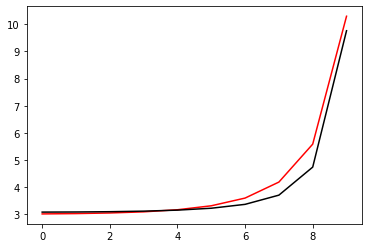

9100 0.006034244164831452
[3.08141821 3.08591679 3.09663048 3.11701036 3.15419634 3.22417348
 3.36745909 3.70741859 4.74268418 9.78010852]


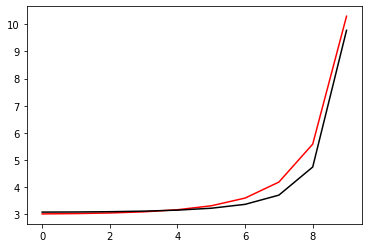

9200 0.005995874345209868
[3.08136618 3.08584793 3.09656942 3.1169382  3.15414381 3.22416859
 3.36761779 3.70810818 4.74539725 9.79465058]


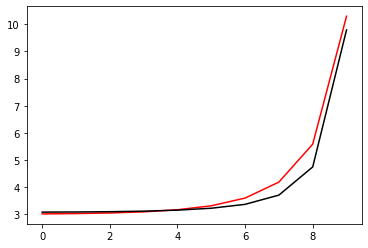

9300 0.005963890118039451
[3.08130406 3.08579612 3.09650102 3.116879   3.15408892 3.22416521
 3.36776656 3.70874552 4.74793327 9.80824027]


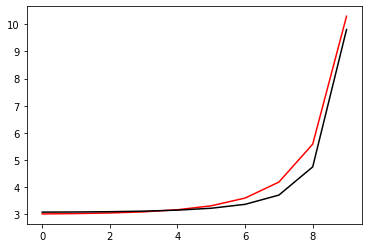

9400 0.005937505661192154
[3.08125271 3.0857417  3.09644292 3.11682004 3.15404106 3.22416216
 3.3679059  3.70934359 4.75029409 9.82087721]


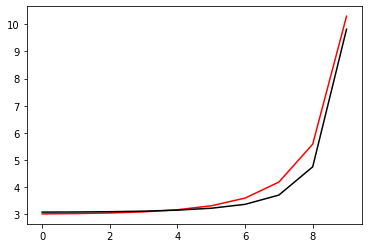

9500 0.005915981444680781
[3.08120508 3.08569137 3.09638911 3.11676561 3.15399694 3.22415973
 3.36803541 3.7098978  4.75247924 9.83256585]


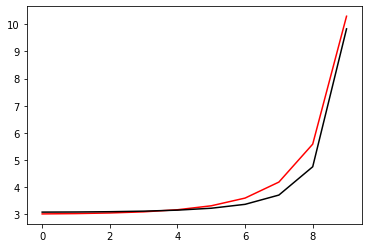

9600 0.00589862918657021
[3.08115994 3.0856463  3.09633838 3.11671677 3.15395547 3.22415865
 3.36815433 3.71040847 4.75448991 9.84331589]


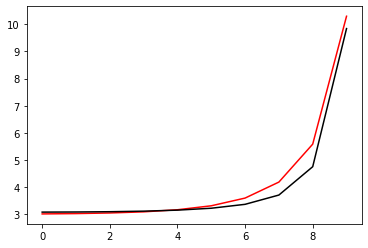

9700 0.005884815765348325
[3.0811202  3.08560356 3.09629344 3.11667104 3.15391863 3.2241575
 3.36826371 3.71087652 4.75632885 9.85314251]


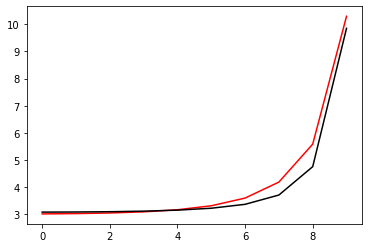

KeyboardInterrupt: 

In [41]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

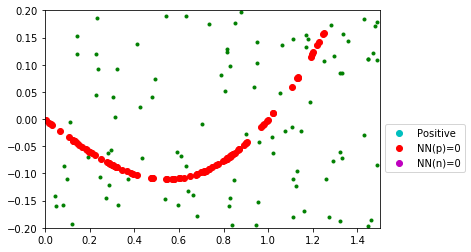

In [42]:
[Positive0, Positive1]=NN_func_01(h, Positive)
[Negative0, Negative1]=NN_func_01(h, Negative)

x_data1=[v[0] for v in Positive0]
y_data1=[v[1] for v in Positive0]
x_data2=[v[0] for v in Positive1]
y_data2=[v[1] for v in Positive1]
x_data3=[v[0] for v in Negative0]
y_data3=[v[1] for v in Negative0]
x_data4=[v[0] for v in Negative1]
y_data4=[v[1] for v in Negative1]
plt.plot(x_data4, y_data4, 'g.')
plt.plot(x_data2, y_data2, 'co', label='Positive')
plt.plot(x_data1, y_data1, 'ro', label='NN(p)=0')
plt.plot(x_data3, y_data3, 'mo', label='NN(n)=0')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()